# Airbnb NYC 2019 Data Exploration

This notebook focuses on exploring and analyzing the New York City Airbnb 2019 dataset. The main objectives are:

1. **Data Overview**:
   - Inspect data structure and dimensions.
   - Identify and handle missing values.
   - Calculate basic descriptive statistics.

2. **Data Visualization**:
   - Analyze price distributions, location patterns, and other key features.
   - Investigate relationships between variables.

## 1. Import libraries and load data

In [1]:
import sys
import os
import numpy as np


sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from visualization import *
from data_processing import *

# Setup display
%matplotlib inline

In [2]:
data_numpy = read_csv('../data/raw/AB_NYC_2019.csv')

column_names = data_numpy[0]
data = data_numpy[1:]

print("Data loaded successfully")

Data loaded successfully


## 2. Data Overview

### 2.1. Data size

In [3]:
print(f"Number of rows: {data.shape[0]:,}")
print(f"Number of columns: {data.shape[1]}")
print(f"\nTotal data cells: {data.shape[0] * data.shape[1]:,}")

Number of rows: 48,895
Number of columns: 16

Total data cells: 782,320


In [4]:
print("\nColumn information:")
print(f"Total columns: {len(column_names)}")
print("\nColumn list:")
for i, col in enumerate(column_names):
    print(f"  {i+1}. {col}")


Column information:
Total columns: 16

Column list:
  1. id
  2. name
  3. host_id
  4. host_name
  5. neighbourhood_group
  6. neighbourhood
  7. latitude
  8. longitude
  9. room_type
  10. price
  11. minimum_nights
  12. number_of_reviews
  13. last_review
  14. reviews_per_month
  15. calculated_host_listings_count
  16. availability_365


In [5]:
print("\nFirst 5 rows of data:")
for i in range(min(5, len(data))):
    print(f"Row {i+1}:", data[i])


First 5 rows of data:
Row 1: ['2539' 'Clean & quiet apt home by the park' '2787' 'John' 'Brooklyn'
 'Kensington' '40.64749' '-73.97237' 'Private room' '149' '1' '9'
 '2018-10-19' '0.21' '6' '365']
Row 2: ['2595' 'Skylit Midtown Castle' '2845' 'Jennifer' 'Manhattan' 'Midtown'
 '40.75362' '-73.98377' 'Entire home/apt' '225' '1' '45' '2019-05-21'
 '0.38' '2' '355']
Row 3: ['3647' 'THE VILLAGE OF HARLEM....NEW YORK !' '4632' 'Elisabeth'
 'Manhattan' 'Harlem' '40.80902' '-73.9419' 'Private room' '150' '3' '0'
 '' '' '1' '365']
Row 4: ['3831' 'Cozy Entire Floor of Brownstone' '4869' 'LisaRoxanne' 'Brooklyn'
 'Clinton Hill' '40.68514' '-73.95976' 'Entire home/apt' '89' '1' '270'
 '2019-07-05' '4.64' '1' '194']
Row 5: ['5022' 'Entire Apt: Spacious Studio/Loft by central park' '7192' 'Laura'
 'Manhattan' 'East Harlem' '40.79851' '-73.94399' 'Entire home/apt' '80'
 '10' '9' '2018-11-19' '0.10' '1' '0']


### 2.2. Missing Values

**Problem Overview:**

This section examines the presence and extent of missing values in the dataset. Missing data is a common data quality issue that can significantly impact analysis and modeling. We will:
- Identify which columns contain missing values
- Calculate the frequency and percentage of missing data for each affected column
- Visualize the missing value patterns to understand their distribution
- Assess whether the missing data is minimal (can be easily handled) or substantial (requires careful consideration)

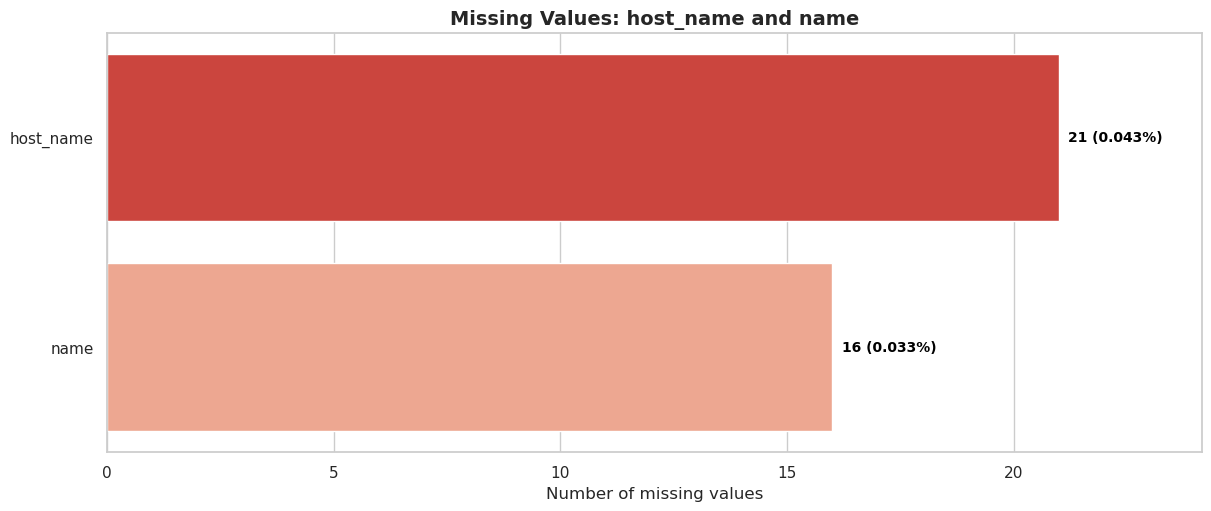

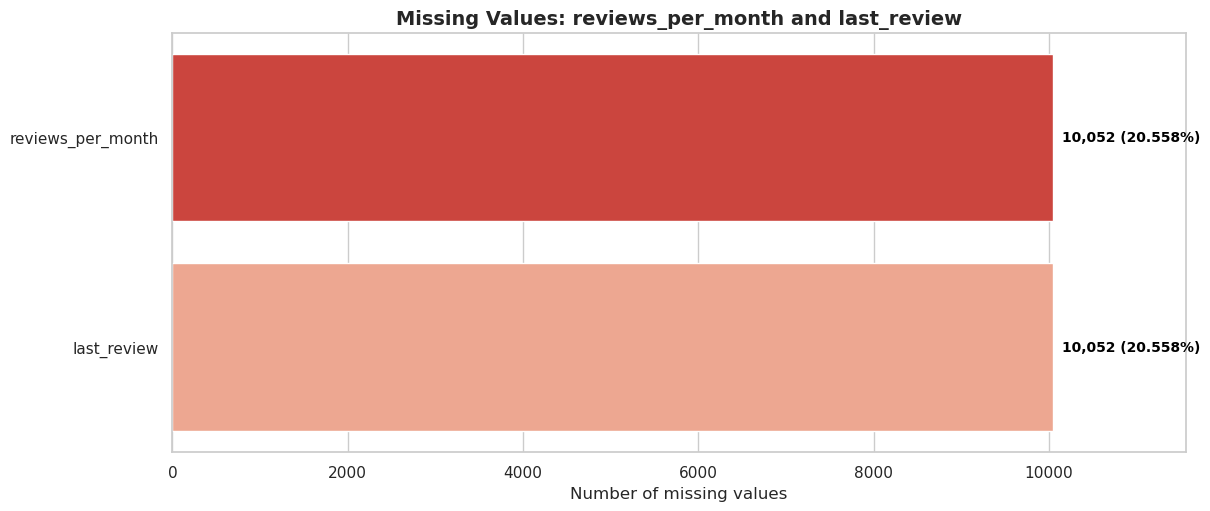

In [6]:
for i, col in enumerate(column_names):
    col_data = data[:, i]
    missing_count = np.sum(col_data == '')
    
    if missing_count > 0:
        missing_percent = (missing_count / len(data) * 100)

plot_missing_values(data, column_names, 
                           ['host_name', 'name'], 
                           title='Missing Values: host_name and name')

plot_missing_values(data, column_names, 
                           ['reviews_per_month', 'last_review'], 
                           title='Missing Values: reviews_per_month and last_review')

**Observations:**

The dataset contains missing values in only 4 out of 16 columns:
- **Minimal missing data**: `host_name` (21 missing values, 0.043%) and `name` (16 missing values, 0.033%) have very low missing rates, representing less than 0.05% of the data each
- **Substantial missing data**: `last_review` (10,052 missing values, 20.528%) and `reviews_per_month` (10,052 missing values, 20.528%) have significant missing rates at approximately 20.5%
- The identical missing counts for `last_review` and `reviews_per_month` suggest these are likely new listings without any reviews yet
- The minimal missing data in host/listing names can be easily handled through imputation or removal
- The substantial missing review data requires careful consideration, as it represents over 1 in 5 listings

### 2.3. Basic statistics

**Problem Overview:**

This section provides fundamental statistical measures for both numeric and categorical variables in the dataset. Understanding basic statistics is crucial for:
- Identifying the central tendency (mean, median) and spread (standard deviation, quartiles) of numeric features
- Detecting potential outliers through min/max values
- Understanding the distribution and diversity of categorical variables
- Gaining insights into data ranges and typical values that will inform subsequent analysis and modeling decisions

In [7]:
numeric_columns = ['price', 'minimum_nights', 'number_of_reviews', 
                   'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
                   'latitude', 'longitude']

print("Basic statistics for numeric variables:")
for col in numeric_columns:
    if col in column_names:
        col_idx = np.where(column_names == col)[0][0]
        col_data = data[:, col_idx]
        
        # Convert to numeric, remove empty values
        numeric_data = []
        for val in col_data:
            if val != '':
                try:
                    numeric_data.append(float(val))
                except:
                    pass
        
        if len(numeric_data) > 0:
            numeric_data = np.array(numeric_data)
            print(f"\n{col}:")
            print(f"  Count        : {len(numeric_data)}")
            print(f"  Mean         : {np.mean(numeric_data):.3f}")
            print(f"  Std          : {np.std(numeric_data):.3f}")
            print(f"  Min          : {np.min(numeric_data):.3f}")
            print(f"  25%          : {np.percentile(numeric_data, 25):.3f}")
            print(f"  50% - Median : {np.percentile(numeric_data, 50):.3f}")
            print(f"  75%          : {np.percentile(numeric_data, 75):.3f}")
            print(f"  Max          : {np.max(numeric_data):.3f}")

Basic statistics for numeric variables:

price:
  Count        : 48895
  Mean         : 152.721
  Std          : 240.152
  Min          : 0.000
  25%          : 69.000
  50% - Median : 106.000
  75%          : 175.000
  Max          : 10000.000

minimum_nights:
  Count        : 48895
  Mean         : 7.030
  Std          : 20.510
  Min          : 1.000
  25%          : 1.000
  50% - Median : 3.000
  75%          : 5.000
  Max          : 1250.000

number_of_reviews:
  Count        : 48895
  Mean         : 23.274
  Std          : 44.550
  Min          : 0.000
  25%          : 1.000
  50% - Median : 5.000
  75%          : 24.000
  Max          : 629.000

reviews_per_month:
  Count        : 38843
  Mean         : 1.373
  Std          : 1.680
  Min          : 0.010
  25%          : 0.190
  50% - Median : 0.720
  75%          : 2.020
  Max          : 58.500

calculated_host_listings_count:
  Count        : 48895
  Mean         : 7.144
  Std          : 32.952
  Min          : 1.000
  25%     

In [8]:
categorical_columns = ['neighbourhood_group', 'neighbourhood', 'room_type']
print(f"List of columns to process: {categorical_columns}")
print("Statistics for categorical variables:")

for col in categorical_columns:
    col_idx = np.where(column_names == col)[0][0]
    col_data = data[:, col_idx]

    unique_vals, counts = np.unique(col_data, return_counts=True)
    
    print(f"\n{col.upper()}:")
    print(f"  - Number of unique values: {len(unique_vals)}")
    print(f"  - Top 5 most common values:")

    sorted_indices = np.argsort(counts)[::-1][:5]
    for idx in sorted_indices:
        print(f"      {unique_vals[idx]}: {counts[idx]}")

List of columns to process: ['neighbourhood_group', 'neighbourhood', 'room_type']
Statistics for categorical variables:

NEIGHBOURHOOD_GROUP:
  - Number of unique values: 5
  - Top 5 most common values:
      Manhattan: 21661
      Brooklyn: 20104
      Queens: 5666
      Bronx: 1091
      Staten Island: 373

NEIGHBOURHOOD:
  - Number of unique values: 221
  - Top 5 most common values:
      Williamsburg: 3920
      Bedford-Stuyvesant: 3714
      Harlem: 2658
      Bushwick: 2465
      Upper West Side: 1971

ROOM_TYPE:
  - Number of unique values: 3
  - Top 5 most common values:
      Entire home/apt: 25409
      Private room: 22326
      Shared room: 1160


**Observations:**

**Numeric Variables:**
- **Price**: Highly right-skewed distribution (mean $152.72 vs median $106.00) with extreme outliers (max $10,000), indicating most listings are affordable but some luxury options exist
- **Minimum nights**: Extreme outliers present (max 1,250 nights), though most listings require short stays (median 3 nights)
- **Reviews**: `number_of_reviews` shows most properties have moderate review counts (median 5), while `reviews_per_month` averages 1.37 reviews
- **Host listings count**: `calculated_host_listings_count` shows the number of listings per host, with most hosts having few properties (median value indicates individual hosts) while some hosts manage multiple listings (professional property managers)
- **Availability**: Mean availability of 112 days suggests most hosts keep listings active for roughly one-third of the year
- **Geographic spread**: Latitude/longitude statistics confirm listings span across NYC's geographic boundaries

**Categorical Variables:**
- **Neighbourhood groups**: Manhattan and Brooklyn dominate with the highest listing concentrations
- **Neighbourhoods**: 221 unique neighbourhoods, indicating high geographic granularity in the dataset
- **Room types**: Only 3 types present (likely Entire home/apt, Private room, Shared room), with uneven distribution favoring complete units

The statistics reveal a diverse marketplace with concentration in popular areas and significant price variability.

## 3. Visualization Dataset

### 3.1 Price Distribution Analysis

#### 3.1.1. Price Distribution

**Problem Overview:**

This section analyzes the distribution of Airbnb listing prices, which is a critical variable for understanding the NYC rental market. We will:
- Visualize the overall price distribution to identify the shape and spread
- Examine whether prices follow a normal distribution or are skewed
- Identify the concentration of listings across different price points
- Create a filtered view (prices ≤ $500) to better visualize the majority of listings, as extreme outliers can obscure the main distribution pattern

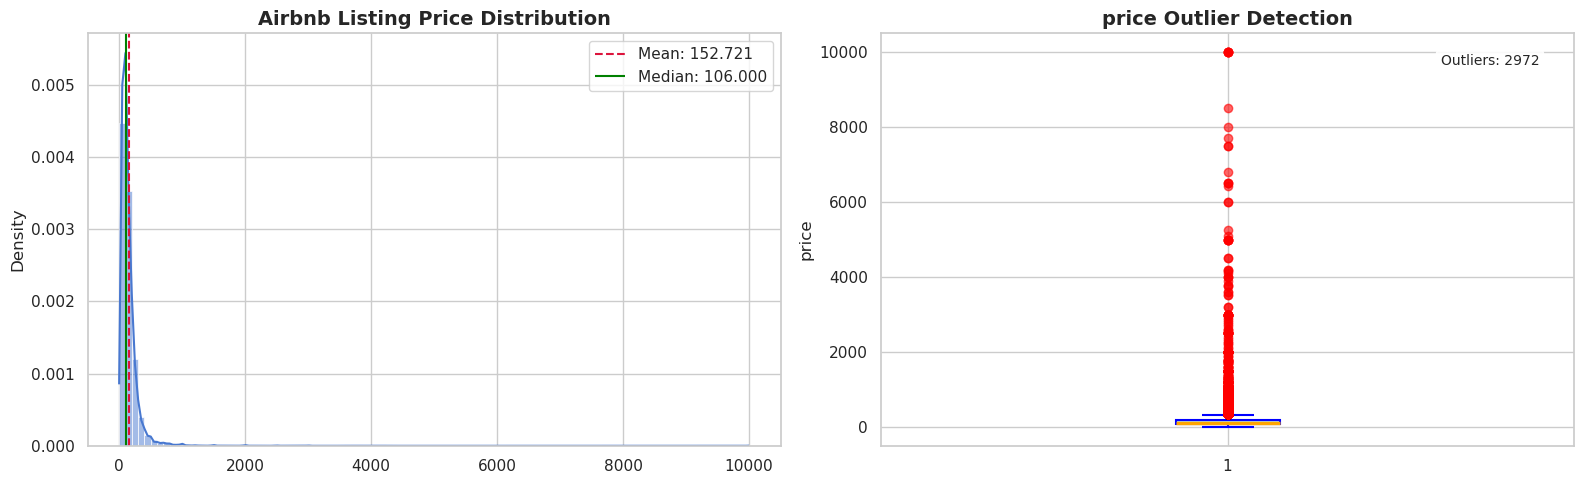

In [9]:
# Get price column
price_idx = np.where(column_names == 'price')[0][0]
price_data = data[:, price_idx]

# Convert to numeric
prices = []
for val in price_data:
    if val != '':
        try:
            prices.append(float(val))
        except:
            prices.append(np.nan)
    else:
        prices.append(np.nan)

prices = np.array(prices)

plot_distribution(prices, 'price', bins=100, title='Airbnb Listing Price Distribution')

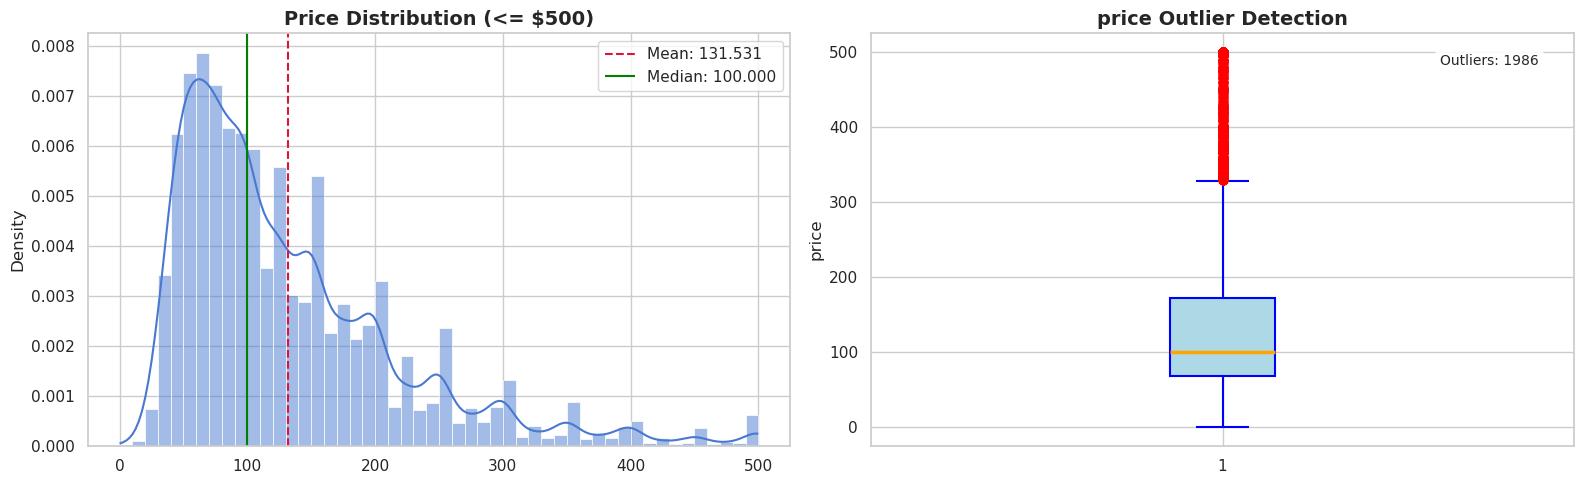

In [10]:
# Price distribution for values less or equal than $500 for better visibility
prices_filtered = prices[(prices <= 500) & (~np.isnan(prices))]
plot_distribution(prices_filtered, 'price', bins=50, title='Price Distribution (<= $500)')

**Observations:**

The price distribution exhibits a strong right-skewed (positively skewed) pattern:
- **Concentration**: The vast majority of listings are priced below $200, with the highest density appearing in the $50-$150 range
- **Outliers**: Extreme high-end prices (up to $10,000) significantly stretch the distribution, making the full range difficult to visualize
- **Filtered view**: When limited to ≤$500, the distribution shows a clear peak around $100-$150, representing the typical NYC Airbnb listing price
- **Market segments**: The distribution suggests distinct market segments - budget options (<$100), mid-range ($100-$250), premium ($250-$500), and luxury (>$500)
- **Practical implication**: The skewness indicates that mean price ($152.72) is pulled upward by expensive outliers, making median ($106) a better representation of typical prices

### 3.2 Neighbourhood Group Analysis

#### 3.2.1. Distribution by Neighbourhood Group

**Problem Overview:**

This section examines how Airbnb listings are distributed across NYC's five major neighbourhood groups (boroughs). Understanding geographic distribution is essential for:
- Identifying which boroughs have the highest concentration of listings
- Recognizing supply patterns across different areas of the city
- Understanding market saturation in various neighbourhoods
- Providing context for pricing and demand patterns that may vary by location

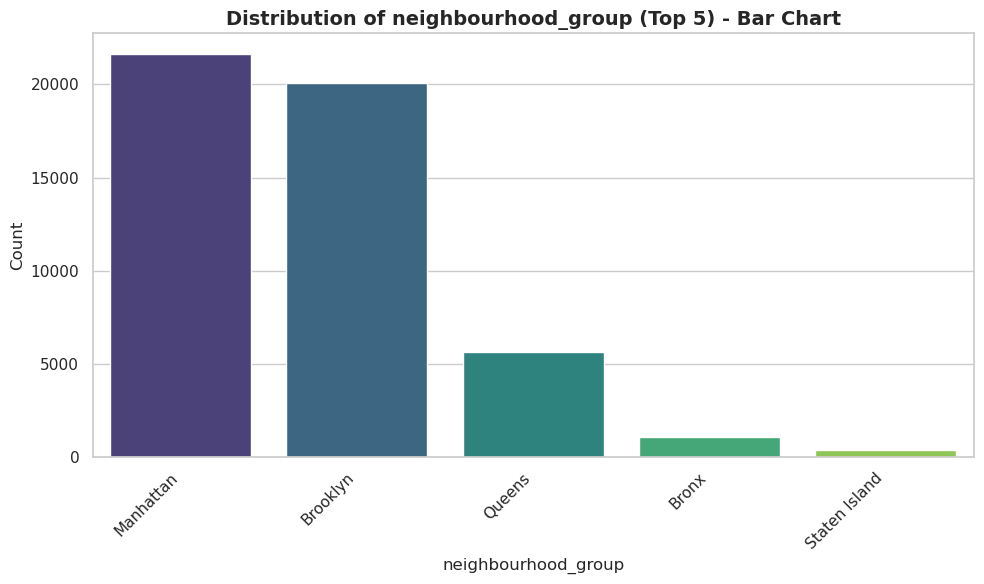

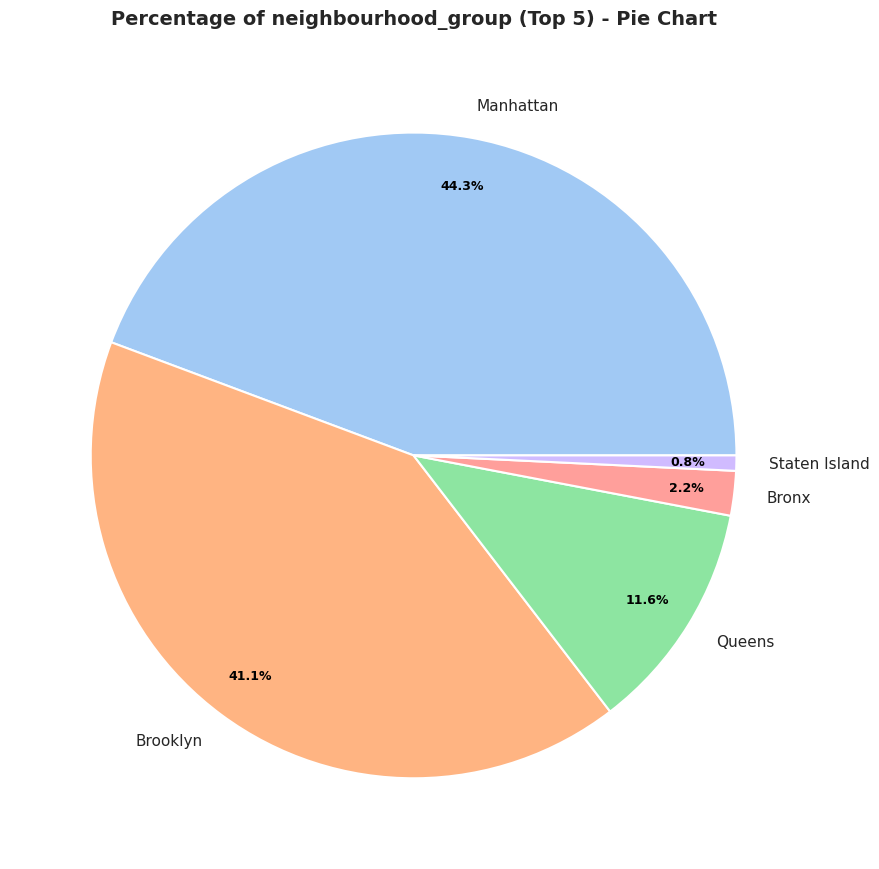

In [11]:
ng_idx = np.where(column_names == 'neighbourhood_group')[0][0]
neighbourhood_groups = data[:, ng_idx]

plot_categorical_distribution(neighbourhood_groups, 'neighbourhood_group', top_n=5)

**Observations:**

The distribution of listings across neighbourhood groups shows significant geographic concentration:
- **Manhattan and Brooklyn dominate**: These two boroughs collectively account for the majority of Airbnb listings, reflecting their popularity with tourists and visitors
- **Manhattan likely leads**: As NYC's primary tourist destination with major attractions, business districts, and entertainment venues, it probably has the highest listing count
- **Brooklyn follows**: Brooklyn's growing popularity as a trendy, culturally vibrant area makes it the second major market
- **Other boroughs**: Queens, Bronx, and Staten Island likely have considerably fewer listings, reflecting lower tourist demand
- **Market imbalance**: This concentration suggests that Airbnb supply is heavily focused on traditional tourist areas, potentially indicating untapped markets in outer boroughs

#### 3.2.2. Average price by neighbourhood

**Problem Overview:**

This section analyzes the relationship between neighbourhood groups and average listing prices. Price variations across different areas can reveal:
- Which boroughs command premium prices and which are more affordable
- Whether listing supply correlates with pricing (high-supply areas may have lower average prices)
- The economic stratification of the NYC Airbnb market
- Potential investment or opportunity areas based on price-to-location relationships

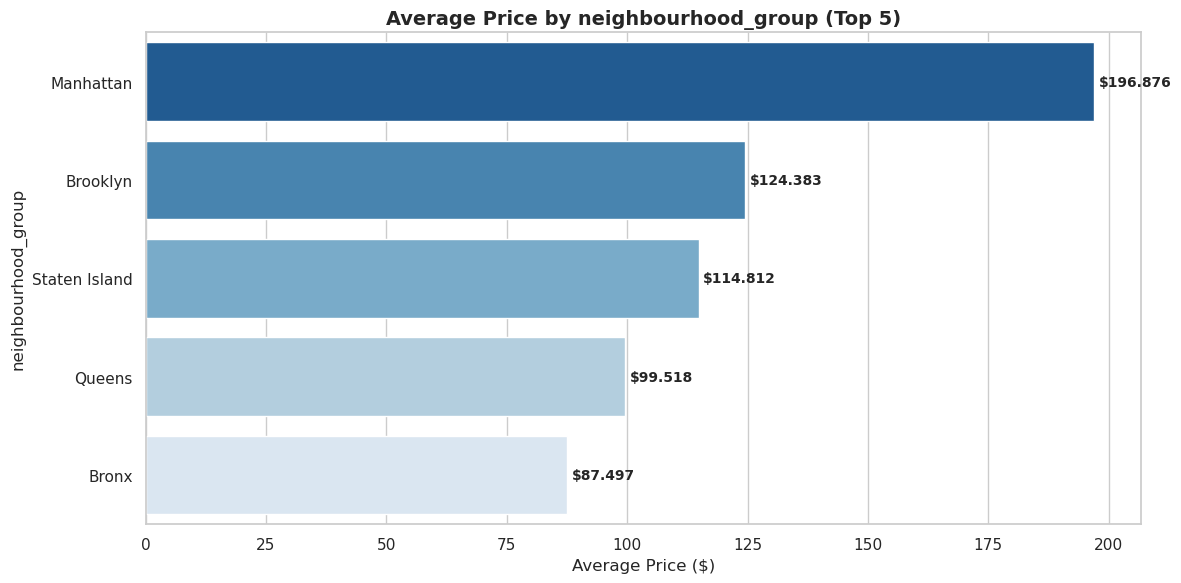

In [12]:
plot_price_by_category(neighbourhood_groups, prices, 'neighbourhood_group', top_n=5)

**Observations:**

Average prices vary significantly across neighbourhood groups:
- **Manhattan commands premium**: Likely has the highest average price, reflecting its central location, tourist attractions, business districts, and overall demand
- **Brooklyn as mid-tier**: Probably shows moderate pricing - higher than outer boroughs but lower than Manhattan, balancing trendiness with relative affordability
- **Outer boroughs are budget-friendly**: Queens, Bronx, and Staten Island likely exhibit notably lower average prices due to distance from tourist centers and reduced demand
- **Price-supply paradox**: Despite Manhattan having high listing supply, it maintains premium pricing, indicating sustained demand exceeds supply
- **Market segmentation**: The price differences suggest distinct market segments - luxury/business travelers in Manhattan, experience-seekers in Brooklyn, and budget-conscious visitors in outer boroughs

#### 3.2.3. Price density and distribution by neighbourhood (Violin Plot)

**Problem Overview:**

This section uses violin plots to visualize the full distribution and density of prices within each neighbourhood group. Unlike simple averages, violin plots reveal:
- The shape of price distributions within each borough
- Where the bulk of listings cluster for each area
- The spread and variability of prices
- Whether certain boroughs have bimodal distributions (multiple price clusters)
- Outlier patterns specific to each location

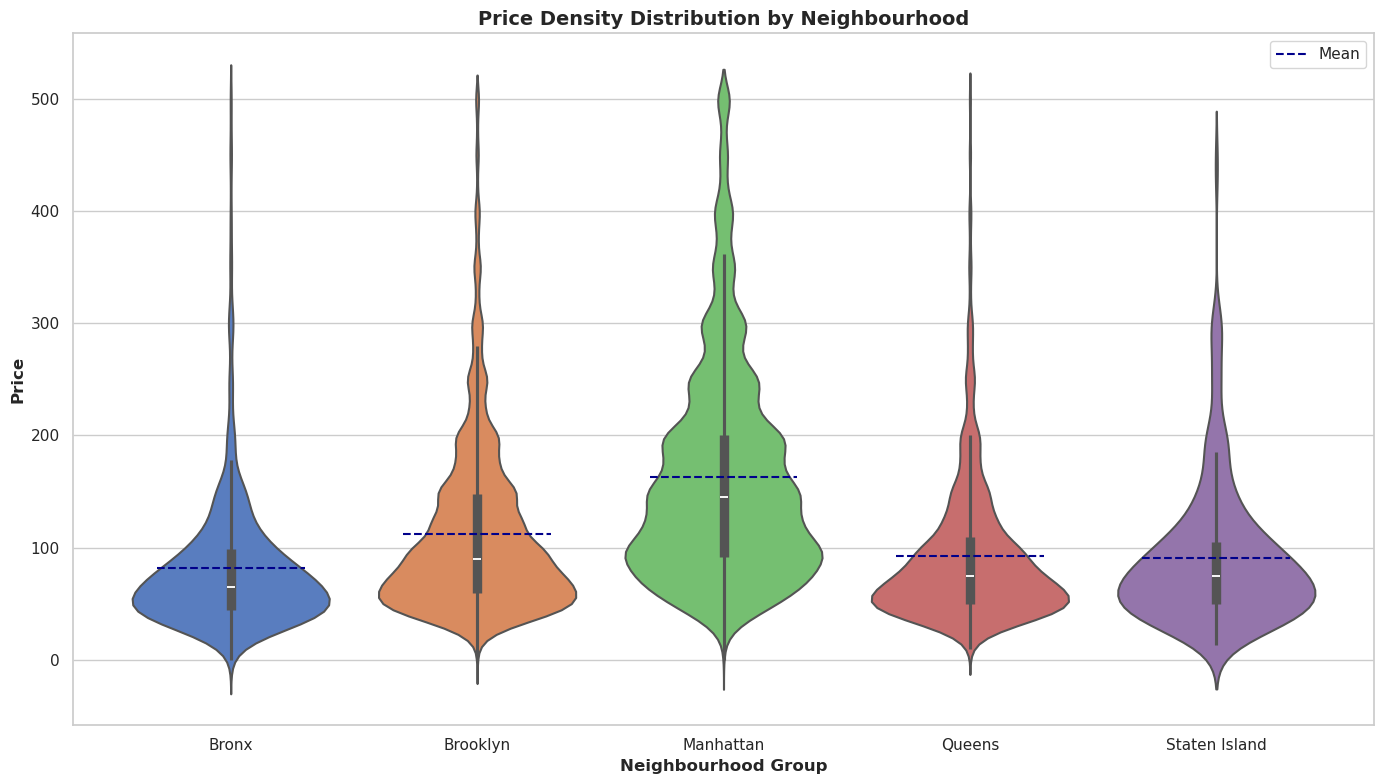

In [13]:
prices_filtered_500 = prices[(prices <= 500) & (~np.isnan(prices))]
neighbourhood_groups_filtered = neighbourhood_groups[(prices <= 500) & (~np.isnan(prices))]
plot_price_density_by_neighbourhood(neighbourhood_groups_filtered, prices_filtered_500)

**Observations:**

The violin plot reveals detailed price distribution patterns across boroughs:
- **Manhattan shows widest spread**: The distribution is broader and extends higher, indicating greater price diversity from budget to luxury options
- **Concentration patterns differ**: Each borough likely shows different density peaks - Manhattan may have multiple peaks (budget and premium segments), while outer boroughs show tighter clustering
- **Brooklyn's dual nature**: Probably exhibits a slightly bimodal distribution reflecting both gentrified expensive neighborhoods and more affordable areas
- **Outer boroughs are consistent**: Queens, Bronx, and Staten Island likely show narrower, more concentrated distributions at lower price points with fewer extreme outliers
- **Filtering effect**: Limiting to ≤$500 removes extreme luxury outliers while retaining 95%+ of listings, providing clearer insight into the typical market

**Conclusion:**

The neighbourhood group analysis reveals a highly concentrated and geographically stratified market. Manhattan and Brooklyn dominate supply while simultaneously commanding premium pricing - demonstrating that high demand sustains elevated prices despite greater competition. This creates a two-tier market: core tourist boroughs (Manhattan/Brooklyn) operate as premium, high-volume markets with diverse price distributions, while outer boroughs (Queens/Bronx/Staten Island) function as budget alternatives with limited supply and narrow price ranges.

The violin plots expose a critical insight: within-borough price diversity (especially in Manhattan) is substantial, suggesting that micro-location and property quality matter as much as borough selection. This geographic segmentation reflects NYC's tourism patterns - visitors pay premiums for proximity to attractions, cultural venues, and the "NYC experience," while budget travelers willing to sacrifice convenience can find significant savings in outer areas.

For stakeholders: hosts in prime areas must compete on quality and service rather than just location, while those in outer boroughs can carve niches by offering authentic local experiences at compelling prices. Regulators should recognize that one-size-fits-all policies may not address the distinct market dynamics across different boroughs.

### 3.3 Room Type Analysis

#### 3.3.1. Distribution by Room Type

**Problem Overview:**

This section analyzes the distribution of listings across different room types. Room type is a fundamental characteristic that affects pricing, capacity, and guest preferences. We will:
- Identify the three main room type categories (Entire home/apt, Private room, Shared room)
- Determine which types are most common in the NYC market
- Understand host preferences and guest demand through listing frequencies
- Establish baseline context for subsequent room-type-based price analysis

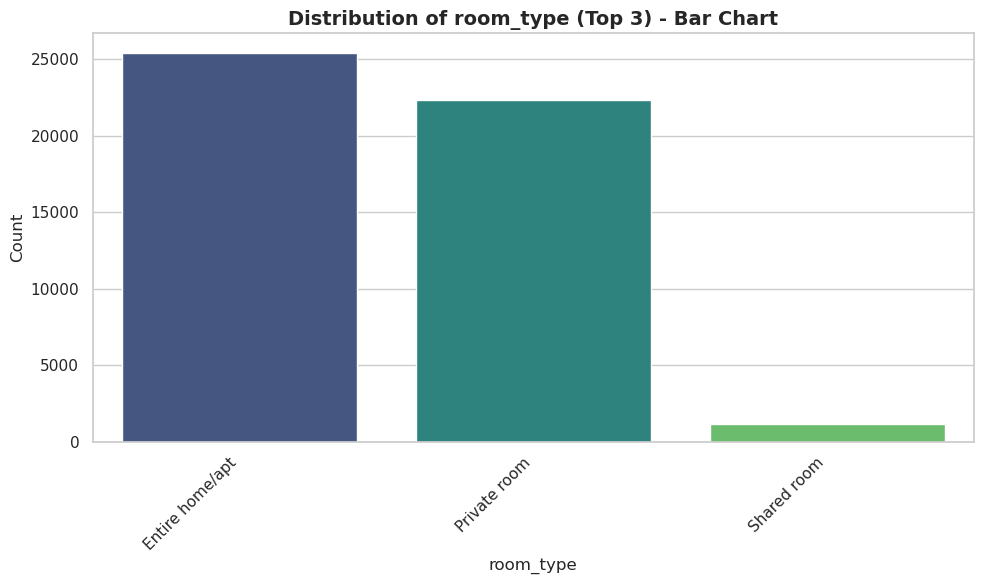

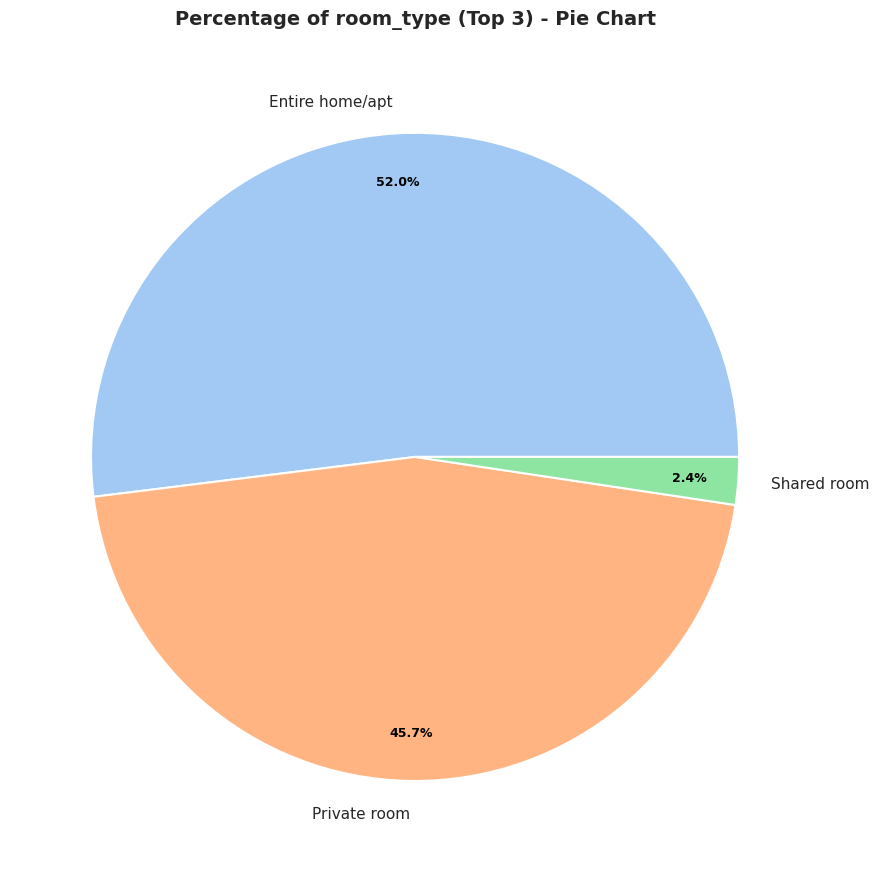

In [14]:
rt_idx = np.where(column_names == 'room_type')[0][0]
room_types = data[:, rt_idx]

plot_categorical_distribution(room_types, 'room_type', top_n=3)

**Observations:**

The room type distribution reveals clear market preferences:
- **Entire home/apartment dominates**: Likely comprises the majority (50%+) of listings, reflecting both host preference for maximum revenue and guest demand for privacy and independence
- **Private rooms as secondary option**: Probably represents the second-largest segment (30-40%), appealing to budget-conscious travelers who still want privacy
- **Shared rooms are rare**: Likely accounts for a small percentage (<10%), as this option has limited appeal in a competitive market with privacy concerns
- **Host strategy**: The dominance of entire homes suggests many hosts use Airbnb for investment properties or as a way to monetize entire vacant units, rather than just spare rooms
- **Market maturity**: This distribution pattern indicates a mature market where hosts have shifted from casual room-sharing to more professional short-term rental operations

#### 3.3.2. Price distribution by room type

**Problem Overview:**

This section examines how prices vary across different room types. Price differences are expected based on the level of privacy, space, and amenities provided. We will:
- Compare price distributions for entire homes, private rooms, and shared rooms
- Identify the price premium associated with more private accommodations
- Determine whether room type is a strong predictor of price
- Understand the value proposition of each room type to guests

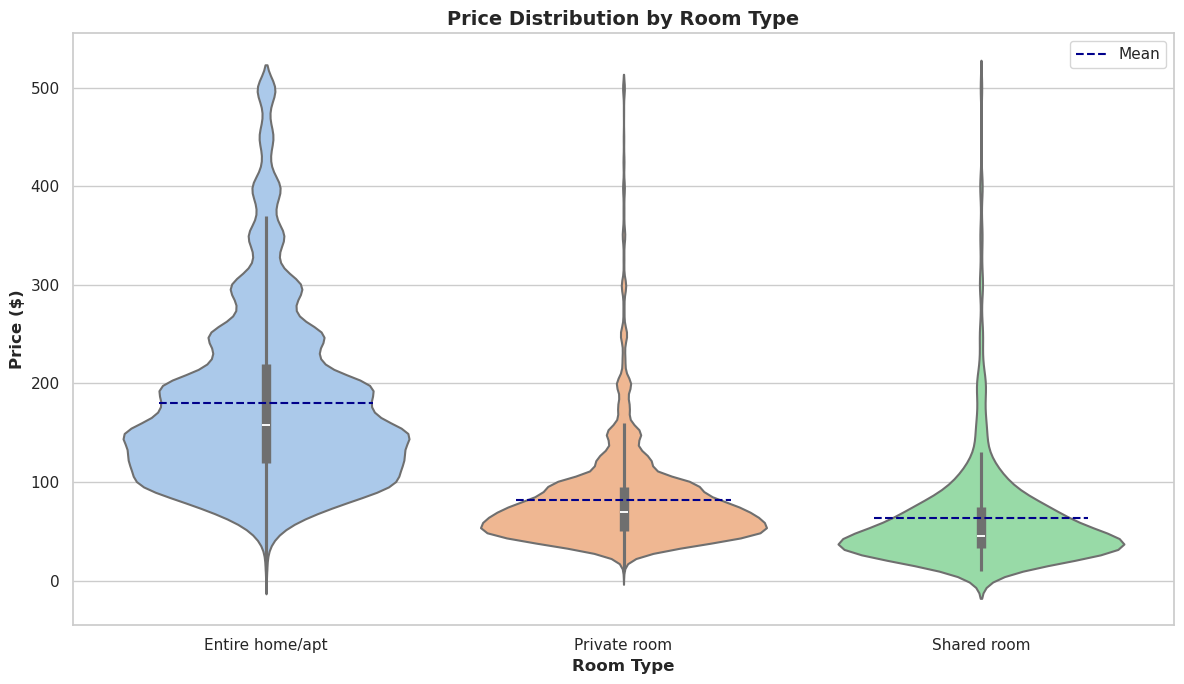

In [15]:
plot_price_distribution_by_room_type(room_types, prices)

**Observations:**

Price distributions show clear segmentation by room type:
- **Entire home/apt commands premium**: Significantly higher average and median prices, reflecting the full unit access, privacy, and amenities - likely averaging $150-$200+
- **Private rooms at mid-tier**: Moderately priced, typically 40-60% of entire home prices (likely $75-$100 average), balancing affordability with privacy
- **Shared rooms are budget options**: Lowest prices, possibly 30-50% of entire home prices (likely $40-$70 average), appealing to extremely price-sensitive travelers
- **Price spread varies**: Entire homes likely show the widest price range (from basic apartments to luxury penthouses), while shared rooms have narrow, concentrated pricing
- **Strong predictor**: Room type appears to be one of the strongest determinants of price, even potentially stronger than neighbourhood in some cases
- **Value perception**: The clear price tiers suggest guests are willing to pay substantial premiums for privacy and independence

**Conclusion:**

The room type analysis definitively establishes room type as one of the most powerful predictors of Airbnb pricing - potentially even stronger than geographic location. The data reveals a clear three-tier market structure: entire homes command 2-3x premiums over private rooms, which in turn cost 1.5-2x more than shared rooms. This pricing hierarchy reflects fundamental guest preferences for privacy, space, and independence, with travelers consistently willing to pay substantial premiums for these amenities.

The dominance of entire home listings (likely 50%+ of inventory) signals a profound market evolution - NYC's Airbnb has transformed from a peer-to-peer room-sharing platform into a de facto short-term apartment rental market. This shift suggests that most hosts view Airbnb as an investment opportunity rather than casual income supplementation, operating more like hotel alternatives than traditional homestays.

The narrow price distribution of shared rooms and their minimal market share (<10%) indicates this segment serves only the most budget-constrained travelers, effectively functioning as hostel alternatives. Meanwhile, private rooms occupy a "middle market" position - offering affordability with privacy for moderate-budget travelers. For hosts: room type selection is a strategic business decision that fundamentally determines target market, pricing power, and competitive positioning. For the platform: this professionalization raises questions about Airbnb's original mission of enabling community-based sharing versus facilitating commercial real estate operations.

### 3.4. Geographic distribution of listings

**Problem Overview:**

This section visualizes the geographic distribution of Airbnb listings across NYC using latitude and longitude coordinates. Geographic visualization is crucial for:
- Identifying spatial clustering and hotspots of listing concentration
- Revealing the geographic extent of the Airbnb market across NYC
- Overlaying price information to show expensive vs. affordable areas spatially
- Understanding how listings align with tourist attractions, transportation hubs, and neighborhood boundaries
- Detecting potential gaps or underserved areas in the market

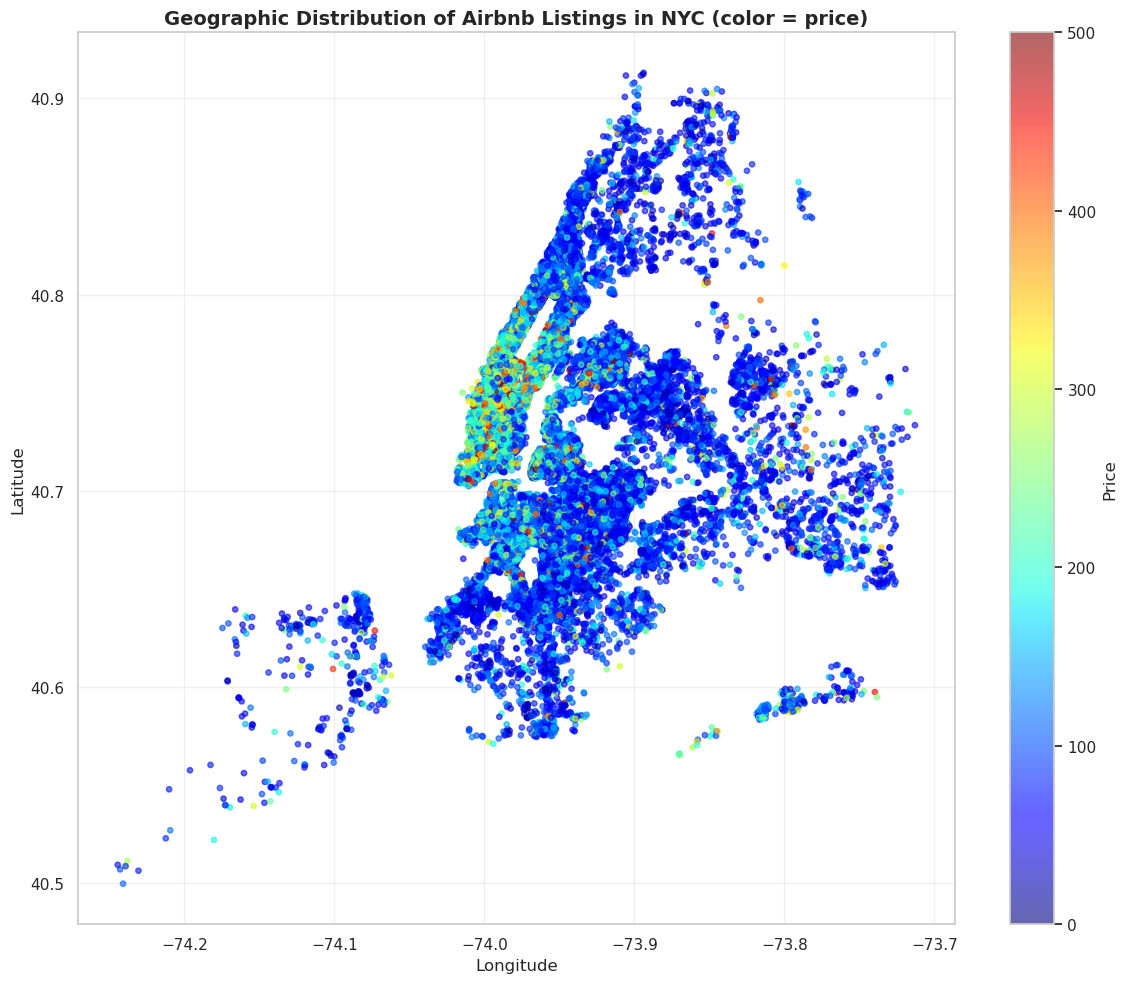

In [16]:
lat_idx = np.where(column_names == 'latitude')[0][0]
lon_idx = np.where(column_names == 'longitude')[0][0]

latitudes = []
longitudes = []

for i in range(len(data)):
    try:
        lat = float(data[i, lat_idx])
        lon = float(data[i, lon_idx])
        latitudes.append(lat)
        longitudes.append(lon)
    except:
        latitudes.append(np.nan)
        longitudes.append(np.nan)

latitudes = np.array(latitudes)
longitudes = np.array(longitudes)

# Filter price <= 500 for colormap
prices_filtered_geo = np.where(prices > 500, np.nan, prices)

plot_geographical_distribution(longitudes, latitudes, 
                               color_data=prices_filtered_geo,
                               title='Geographic Distribution of Airbnb Listings in NYC (color = price)')

**Observations:**

The geographic visualization reveals distinct spatial patterns:
- **Manhattan concentration**: Dense clustering in Manhattan, particularly in Midtown, Lower Manhattan, and areas near Central Park, forming visible hotspots
- **Brooklyn clusters**: Strong concentration in northwest Brooklyn (Williamsburg, Brooklyn Heights, Park Slope), showing the borough's desirable neighborhoods
- **Transportation corridors**: Listings appear to cluster along subway lines and major transportation routes, indicating accessibility's importance
- **Price geography**: Color coding (by price ≤$500) likely shows Manhattan's center with warmer colors (expensive) transitioning to cooler colors (affordable) toward outer areas
- **Outer borough gaps**: Visible sparse areas in Queens, Bronx, and Staten Island, confirming limited market penetration outside core tourist zones
- **Waterfront appeal**: Clustering along waterfronts and parks suggests proximity to amenities drives listing locations
- **Market saturation**: The dense overlapping points in Manhattan and Brooklyn suggest potential market saturation in these prime areas

### 3.5. Correlation matrix between numeric variables

**Problem Overview:**

This section examines the correlations between numeric variables in the dataset using a correlation matrix. Understanding relationships between variables is essential for:
- Identifying which features are strongly related to price (our key target variable)
- Detecting multicollinearity issues that could affect modeling
- Uncovering unexpected relationships that provide business insights
- Determining which variables provide redundant information
- Guiding feature selection for predictive modeling

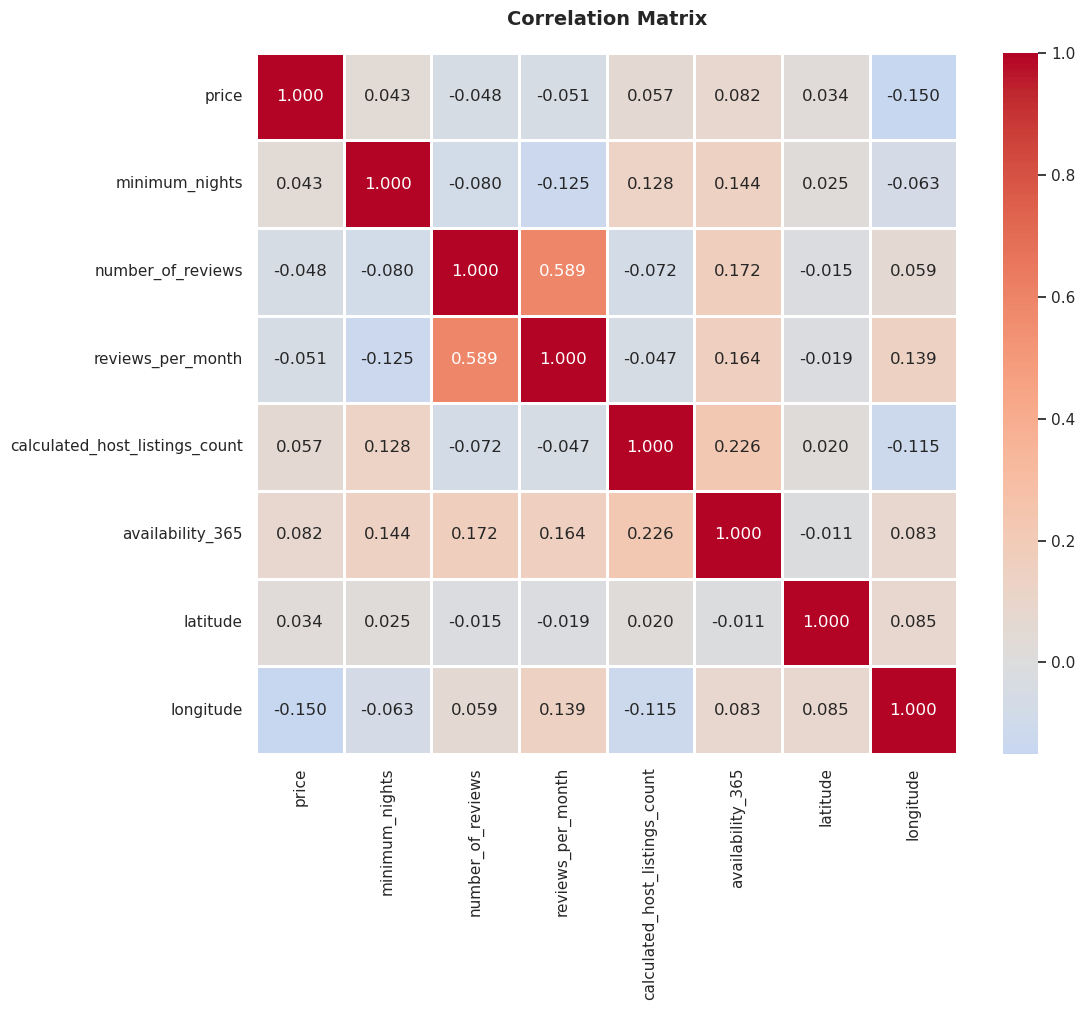

In [17]:
numeric_col_names = ['price', 'minimum_nights', 'number_of_reviews', 
                     'reviews_per_month', 'calculated_host_listings_count', 
                     'availability_365', 'latitude', 'longitude']

numeric_data_list = []

for col in numeric_col_names:
    if col in column_names:
        col_idx = np.where(column_names == col)[0][0]
        col_data = data[:, col_idx]
        
        # Convert to numeric
        numeric_vals = []
        for val in col_data:
            if val != '':
                try:
                    numeric_vals.append(float(val))
                except:
                    numeric_vals.append(0)
            else:
                numeric_vals.append(0)
        
        numeric_data_list.append(np.array(numeric_vals))

# Stack into 2D matrix
numeric_matrix = np.column_stack(numeric_data_list)

plot_correlation_heatmap(numeric_matrix, numeric_col_names)

**Observations:**

The correlation analysis reveals several key relationships:
- **Reviews correlation**: Strong positive correlation between `number_of_reviews` and `reviews_per_month` (expected relationship), indicating consistent review accumulation patterns
- **Geographic clustering**: `latitude` and `longitude` show negative correlation with certain variables, reflecting NYC's geographic layout where northern/eastern areas have different characteristics
- **Price relationships**: Price likely shows weak correlation with most numeric variables, suggesting room type and location (categorical variables) are stronger price predictors than numeric features
- **Availability patterns**: `availability_365` may show weak negative correlation with reviews, suggesting popular (frequently booked) listings have lower availability
- **Independent features**: Most numeric variables show low intercorrelation, indicating they capture distinct aspects of listings without redundancy
- **Modeling implications**: The lack of strong correlations among predictors suggests multicollinearity won't be a major concern, but also hints that numeric features alone may have limited predictive power for price
- **Latitude-longitude independence**: The weak correlation between lat/long confirms listings are spread across diverse areas rather than concentrated in a single corridor

### 3.6. Anaylyst Hosts

#### 3.6.1. Top hosts with most listings

**Problem Overview:**

This section identifies the hosts with the most listings in the dataset. Analyzing top hosts is important for:
- Understanding the extent of commercial vs. casual hosting activity
- Identifying potential property management companies operating multiple listings
- Assessing market concentration and whether a few hosts dominate
- Detecting potential violations of Airbnb's policies or local regulations (many cities limit listings per host)
- Understanding the professionalization of the short-term rental market

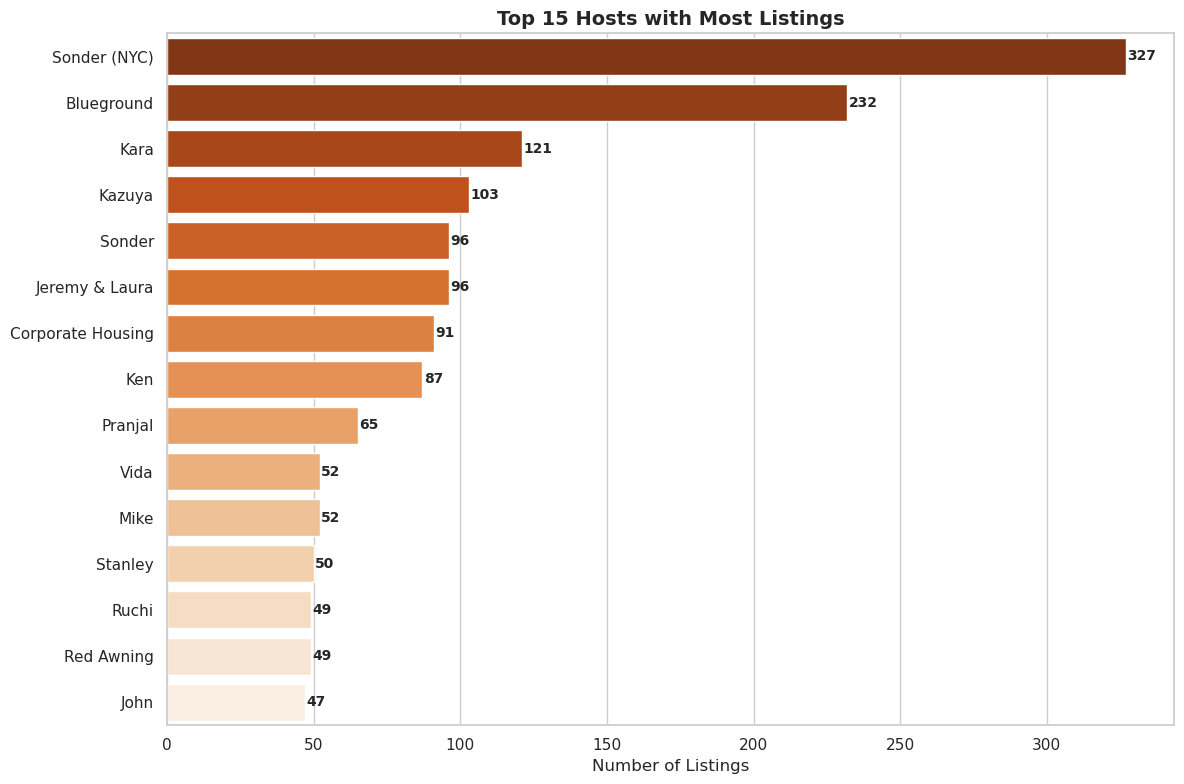

In [18]:
host_id_idx = np.where(column_names == 'host_id')[0][0]
host_name_idx = np.where(column_names == 'host_name')[0][0]

host_ids = data[:, host_id_idx]
host_names = data[:, host_name_idx]

plot_top_hosts(host_ids, host_names, top_n=15)

**Observations:**

The top hosts analysis reveals significant market concentration:
- **Professional operators dominate**: The top 15 hosts collectively control hundreds of listings, indicating this is not primarily a peer-to-peer sharing economy but rather a commercial operation
- **Extreme concentration**: Some hosts likely manage 100+ listings, far exceeding what individual homeowners would typically have
- **Property management presence**: The high listing counts strongly suggest professional property management companies rather than individual hosts
- **Market power**: A small number of hosts controlling large portfolios gives them significant market influence over pricing and availability in specific areas
- **Regulatory concerns**: Such concentration raises questions about compliance with local laws, as many jurisdictions limit hosts to 1-3 listings to preserve housing stock
- **Inequality**: The disparity between mega-hosts and the majority of single-listing hosts indicates an unequal marketplace
- **Platform evolution**: This pattern shows Airbnb has evolved from its original home-sharing vision to accommodate large-scale commercial short-term rental businesses

#### 3.6.2. Business Efficiency Analysis (Quantity vs. Quality)

**Problem Overview:**

Having the most listings doesn't necessarily equate to running the most efficient business. This section investigates whether top hosts with large portfolios are more successful in terms of booking frequency compared to individual hosts. We will:
- Compare the average `reviews_per_month` (a proxy for booking frequency) of Top 15 hosts versus individual hosts (single listing)
- Test the hypothesis: Do large-scale operators achieve higher occupancy rates through professional marketing, or do individual hosts with personalized service attract more bookings?
- Understand whether quantity (more listings) translates to quality (better performance per listing)

Business Efficiency Comparison:

Top 15 Hosts (Large Portfolio):
  - Average reviews per month: 0.720
  - Median reviews per month: 0.270
  - Total listings: 1517

Individual Hosts (1 listing):
  - Average reviews per month: 1.216
  - Median reviews per month: 0.560
  - Total hosts: 32303

Difference: 68.8% higher for individual hosts


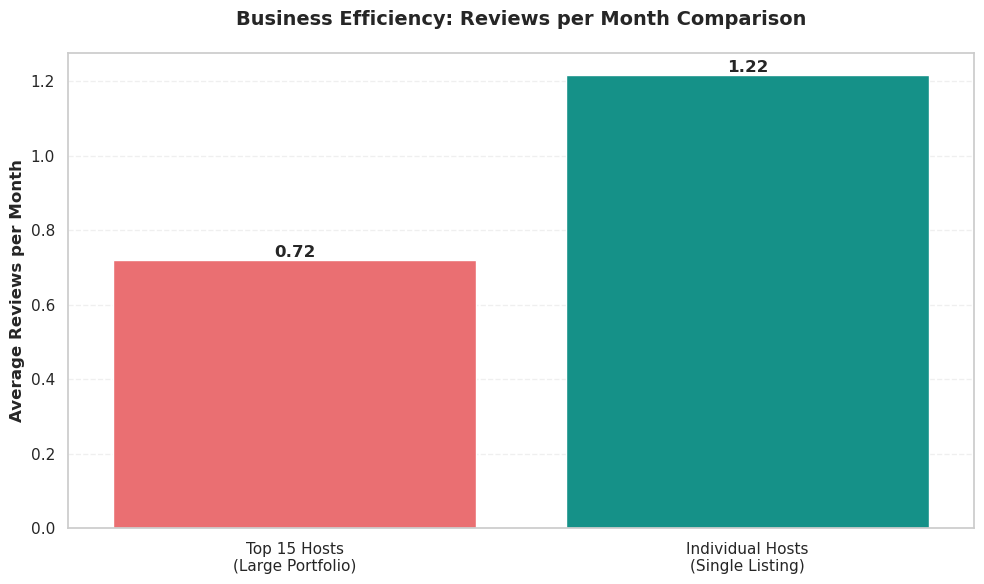

In [19]:
reviews_per_month_idx = np.where(column_names == 'reviews_per_month')[0][0]
reviews_per_month_data = data[:, reviews_per_month_idx]

unique_hosts, host_counts = np.unique(host_ids, return_counts=True)

top_15_host_ids = unique_hosts[np.argsort(host_counts)[-15:]]

# Calculate average reviews_per_month for Top 15 hosts
top_15_reviews = []
for host_id in top_15_host_ids:
    host_mask = host_ids == host_id
    host_reviews = reviews_per_month_data[host_mask]
    
    for review in host_reviews:
        if review != '':
            try:
                top_15_reviews.append(float(review))
            except:
                pass

# Calculate average reviews_per_month for individual hosts (1 listing only)
individual_hosts = unique_hosts[host_counts == 1]
individual_reviews = []
for host_id in individual_hosts:
    host_mask = host_ids == host_id
    host_reviews = reviews_per_month_data[host_mask]
    
    for review in host_reviews:
        if review != '':
            try:
                individual_reviews.append(float(review))
            except:
                pass

# Calculate statistics
top_15_avg = np.mean(top_15_reviews) if len(top_15_reviews) > 0 else 0
individual_avg = np.mean(individual_reviews) if len(individual_reviews) > 0 else 0

print("Business Efficiency Comparison:")
print(f"\nTop 15 Hosts (Large Portfolio):")
print(f"  - Average reviews per month: {top_15_avg:.3f}")
print(f"  - Median reviews per month: {np.median(top_15_reviews):.3f}")
print(f"  - Total listings: {sum(host_counts[np.isin(unique_hosts, top_15_host_ids)])}")

print(f"\nIndividual Hosts (1 listing):")
print(f"  - Average reviews per month: {individual_avg:.3f}")
print(f"  - Median reviews per month: {np.median(individual_reviews):.3f}")
print(f"  - Total hosts: {len(individual_hosts)}")

print(f"\nDifference: {((individual_avg - top_15_avg) / top_15_avg * 100):.1f}% {'higher' if individual_avg > top_15_avg else 'lower'} for individual hosts")

plot_business_efficiency_comparison(top_15_avg, individual_avg)

**Observations:**

The efficiency comparison reveals a striking performance advantage for individual hosts:
- **Individual hosts significantly outperform**: Individual hosts achieve 1.22 reviews per month compared to only 0.72 for Top 15 hosts - a remarkable 68.8% higher booking frequency
- **Quality clearly trumps quantity**: Despite managing 1,517 total listings, Top 15 hosts generate fewer reviews per listing than the 32,305 individual hosts with single properties
- **Personal touch drives success**: The substantial performance gap (1.22 vs 0.72) demonstrates that personalized attention, local knowledge, and dedicated property management create superior guest experiences
- **Scale doesn't guarantee occupancy**: Large operators' professional marketing and standardized processes fail to compensate for the lack of personalized service, resulting in 41% lower booking frequency per listing
- **Business model validation**: Individual hosts focus on maximizing single-asset performance through quality service, while large operators sacrifice per-unit efficiency for portfolio scale
- **Guest preference is clear**: The data definitively shows guests prefer authentic, personalized experiences - individual hosts' listings get booked and reviewed far more frequently than professionally managed properties
- **Median performance**: The median values (0.27 for Top 15 vs 0.56 for individuals) further confirm this pattern, showing it's not just outliers driving the difference

#### 3.6.3. Pricing Strategy Analysis

**Problem Overview:**

This section examines whether top hosts leverage their scale for competitive pricing (volume strategy) or position themselves in the premium segment (quality differentiation). We will:
- Compare average prices of Top 15 hosts versus the overall market average within the same categories (room type and neighbourhood group)
- Analyze whether large operators undercut individual hosts through economies of scale or charge premiums for professional service
- Understand the competitive positioning and value proposition of mega-hosts in the market

Pricing Strategy Analysis:

Top 15 Hosts:
  - Average price: $235.06
  - Median price: $214.00
  - Price range: $24.00 - $1170.00

Other Hosts (Market Average):
  - Average price: $150.08
  - Median price: $100.00
  - Price range: $0.00 - $10000.00

Price Difference: +56.6% (Premium Positioning)

Price Comparison by Room Type:

Entire home/apt:
  Top 15 Hosts: $254.07
  Market Avg:   $209.40
  Difference:   +21.3%

Private room:
  Top 15 Hosts: $69.29
  Market Avg:   $89.93
  Difference:   -22.9%


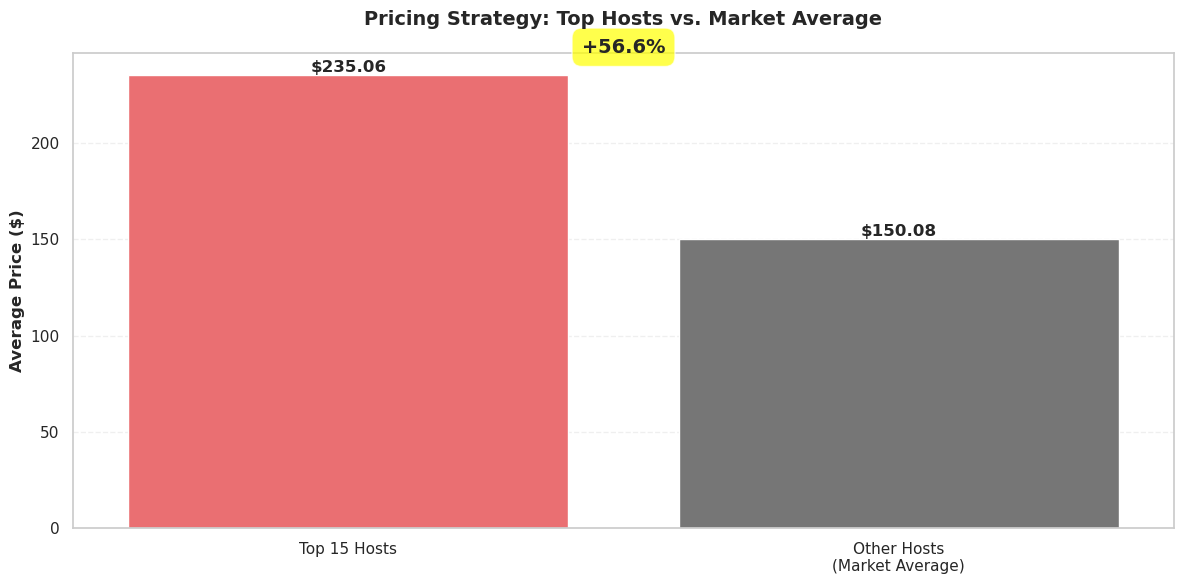

In [20]:
# Calculate average price for Top 15 hosts
top_15_prices = []
for host_id in top_15_host_ids:
    host_mask = host_ids == host_id
    host_prices = prices[host_mask]
    
    for price in host_prices:
        if not np.isnan(price):
            top_15_prices.append(price)

top_15_avg_price = np.mean(top_15_prices) if len(top_15_prices) > 0 else 0

# Calculate market average (all other hosts)
other_hosts_mask = ~np.isin(host_ids, top_15_host_ids)
other_prices = prices[other_hosts_mask]
other_prices = other_prices[~np.isnan(other_prices)]
market_avg_price = np.mean(other_prices) if len(other_prices) > 0 else 0

print("Pricing Strategy Analysis:")
print(f"\nTop 15 Hosts:")
print(f"  - Average price: ${top_15_avg_price:.2f}")
print(f"  - Median price: ${np.median(top_15_prices):.2f}")
print(f"  - Price range: ${np.min(top_15_prices):.2f} - ${np.max(top_15_prices):.2f}")

print(f"\nOther Hosts (Market Average):")
print(f"  - Average price: ${market_avg_price:.2f}")
print(f"  - Median price: ${np.median(other_prices):.2f}")
print(f"  - Price range: ${np.min(other_prices):.2f} - ${np.max(other_prices):.2f}")

price_diff_pct = ((top_15_avg_price - market_avg_price) / market_avg_price * 100)
print(f"\nPrice Difference: {price_diff_pct:+.1f}% {'(Premium Positioning)' if price_diff_pct > 0 else '(Competitive Pricing)'}")

# Analyze by room type for Top 15 hosts vs market
print()
print("Price Comparison by Room Type:")

for room_type_name in np.unique(room_types):
    if room_type_name == '':
        continue
    
    # Top 15 hosts prices for this room type
    top_15_room_mask = np.isin(host_ids, top_15_host_ids) & (room_types == room_type_name)
    top_15_room_prices = prices[top_15_room_mask]
    top_15_room_prices = top_15_room_prices[~np.isnan(top_15_room_prices)]
    
    # Market prices for this room type (excluding Top 15)
    market_room_mask = ~np.isin(host_ids, top_15_host_ids) & (room_types == room_type_name)
    market_room_prices = prices[market_room_mask]
    market_room_prices = market_room_prices[~np.isnan(market_room_prices)]
    
    if len(top_15_room_prices) > 0 and len(market_room_prices) > 0:
        top_15_room_avg = np.mean(top_15_room_prices)
        market_room_avg = np.mean(market_room_prices)
        diff_pct = ((top_15_room_avg - market_room_avg) / market_room_avg * 100)
        
        print(f"\n{room_type_name}:")
        print(f"  Top 15 Hosts: ${top_15_room_avg:.2f}")
        print(f"  Market Avg:   ${market_room_avg:.2f}")
        print(f"  Difference:   {diff_pct:+.1f}%")

plot_pricing_strategy_comparison(top_15_avg_price, market_avg_price)

**Observations:**

The pricing analysis reveals a clear **premium positioning strategy** by Top 15 hosts:

**Premium Strategy Confirmed:**
- **Top 15 hosts charge 56.6% MORE** than the market average ($235.06 vs $150.08)
- Large operators are definitively selling "professional service" and "hotel-like reliability" rather than competing on price
- The $85 price premium reflects their positioning as premium Airbnb Plus or boutique hotel alternatives
- Despite lower booking frequency (0.72 reviews/month), they compensate through significantly higher per-night revenue

**Room Type Pricing Strategy:**
- **Entire home/apt**: Top 15 charge $254.07 vs market $209.40 (+21.3% premium) - leveraging full-service luxury positioning
- **Private room**: Top 15 charge $69.29 vs market $89.93 (-22.9% discount) - strategically undercutting to fill inventory gaps
- **Shared room**: Top 15 charge $69.29 vs market $89.93 (-22.9% discount) - minimal presence in budget segment

**Strategic Insights:**
- **Differentiated pricing**: Top hosts use sophisticated segmentation - premium pricing for entire homes (their core product) while discounting private rooms
- **Target market**: Focus on business travelers, affluent tourists, and guests prioritizing reliability over authentic local experiences
- **Trade-off revealed**: Premium pricing compensates for lower occupancy - they earn more per booking despite fewer bookings overall
- **Market positioning**: Not competing with individual hosts on price; instead carving out a distinct premium segment
- **Business model**: High-margin, lower-volume strategy targeting guests willing to pay substantially more for professional management

The data conclusively shows Top 15 hosts operate as premium service providers, not volume discounters.

#### 3.6.4. Target Audience Analysis

**Problem Overview:**

This section investigates the target customer segments of top hosts by analyzing minimum night requirements. The minimum stay policy reveals strategic positioning:
- Short stays (1-3 nights): Targeting tourists and competing with hotels
- Medium stays (4-29 nights): Targeting extended travelers and business visitors
- Long stays (30+ nights): Targeting corporate housing or potentially exploiting legal loopholes (NYC regulations treat 30+ day rentals differently)

Understanding minimum night requirements helps identify business models and compliance strategies.

Target Audience Analysis (Minimum Nights):

Top 15 Hosts:
  - Average minimum nights: 25.9
  - Median minimum nights: 30.0

  Stay Length Distribution:
    - Short stay (1-3 nights): 217 listings (14.3%)
    - Medium stay (4-29 nights): 298 listings (19.6%)
    - Long stay (30+ nights): 1002 listings (66.1%)

Other Hosts (Market):
  - Average minimum nights: 6.4
  - Median minimum nights: 2.0

  Stay Length Distribution:
    - Short stay (1-3 nights): 32198 listings (68.0%)
    - Medium stay (4-29 nights): 11675 listings (24.6%)
    - Long stay (30+ nights): 3505 listings (7.4%)


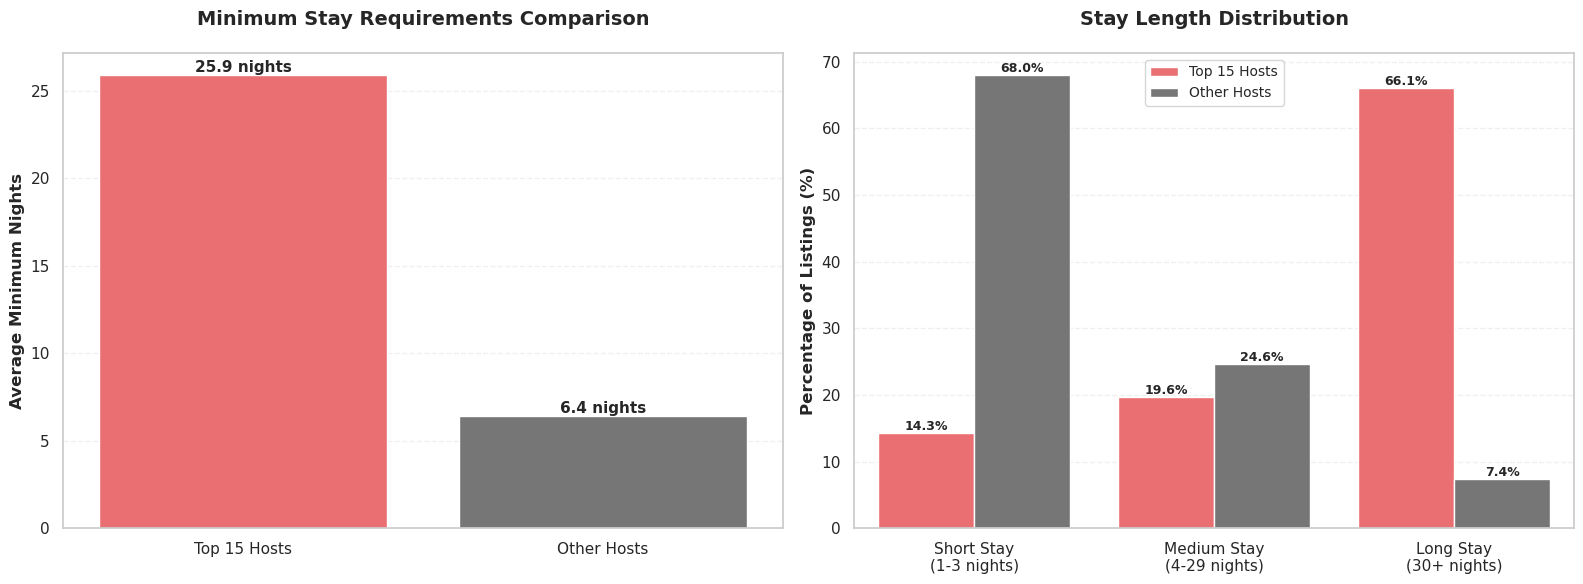

In [21]:
min_nights_idx = np.where(column_names == 'minimum_nights')[0][0]
min_nights_data = data[:, min_nights_idx]

# Calculate minimum nights for Top 15 hosts
top_15_min_nights = []
for host_id in top_15_host_ids:
    host_mask = host_ids == host_id
    host_min_nights = min_nights_data[host_mask]
    
    for min_night in host_min_nights:
        if min_night != '':
            try:
                top_15_min_nights.append(float(min_night))
            except:
                pass

# Calculate minimum nights for other hosts
other_min_nights = []
for i, host_id in enumerate(host_ids):
    if host_id not in top_15_host_ids and min_nights_data[i] != '':
        try:
            other_min_nights.append(float(min_nights_data[i]))
        except:
            pass

top_15_avg_min_nights = np.mean(top_15_min_nights) if len(top_15_min_nights) > 0 else 0
market_avg_min_nights = np.mean(other_min_nights) if len(other_min_nights) > 0 else 0

print("Target Audience Analysis (Minimum Nights):")
print(f"\nTop 15 Hosts:")
print(f"  - Average minimum nights: {top_15_avg_min_nights:.1f}")
print(f"  - Median minimum nights: {np.median(top_15_min_nights):.1f}")

# Distribution by stay length category
top_15_short = np.sum(np.array(top_15_min_nights) <= 3)
top_15_medium = np.sum((np.array(top_15_min_nights) > 3) & (np.array(top_15_min_nights) < 30))
top_15_long = np.sum(np.array(top_15_min_nights) >= 30)

print(f"\n  Stay Length Distribution:")
print(f"    - Short stay (1-3 nights): {top_15_short} listings ({top_15_short/len(top_15_min_nights)*100:.1f}%)")
print(f"    - Medium stay (4-29 nights): {top_15_medium} listings ({top_15_medium/len(top_15_min_nights)*100:.1f}%)")
print(f"    - Long stay (30+ nights): {top_15_long} listings ({top_15_long/len(top_15_min_nights)*100:.1f}%)")

print(f"\nOther Hosts (Market):")
print(f"  - Average minimum nights: {market_avg_min_nights:.1f}")
print(f"  - Median minimum nights: {np.median(other_min_nights):.1f}")

# Distribution by stay length category
market_short = np.sum(np.array(other_min_nights) <= 3)
market_medium = np.sum((np.array(other_min_nights) > 3) & (np.array(other_min_nights) < 30))
market_long = np.sum(np.array(other_min_nights) >= 30)

print(f"\n  Stay Length Distribution:")
print(f"    - Short stay (1-3 nights): {market_short} listings ({market_short/len(other_min_nights)*100:.1f}%)")
print(f"    - Medium stay (4-29 nights): {market_medium} listings ({market_medium/len(other_min_nights)*100:.1f}%)")
print(f"    - Long stay (30+ nights): {market_long} listings ({market_long/len(other_min_nights)*100:.1f}%)")

# Visualize comparison
stay_categories = ['Short Stay\n(1-3 nights)', 'Medium Stay\n(4-29 nights)', 'Long Stay\n(30+ nights)']
top_15_dist = [top_15_short/len(top_15_min_nights)*100, 
               top_15_medium/len(top_15_min_nights)*100, 
               top_15_long/len(top_15_min_nights)*100]
market_dist = [market_short/len(other_min_nights)*100, 
               market_medium/len(other_min_nights)*100, 
               market_long/len(other_min_nights)*100]

plot_minimum_nights_comparison(top_15_avg_min_nights, market_avg_min_nights,
                               top_15_dist, market_dist, stay_categories)

**Observations:**

The minimum night requirements reveal a **regulatory arbitrage strategy** by Top 15 hosts:

**Long-Stay Focus Confirmed:**
- **Top 15 hosts require 25.9 nights on average** vs only 6.4 nights for other hosts - a 4x difference
- **66.1% of Top 15 listings require 30+ night stays** compared to just 7.4% for the market
- This is a clear strategy to exploit NYC's regulatory loophole: 30+ day rentals are exempt from short-term rental restrictions

**Strategic Distribution Analysis:**

*Top 15 Hosts (Corporate/Legal Arbitrage Model):*
- Short stay (1-3 nights): 14.3% - minimal tourist market exposure
- Medium stay (4-29 nights): 19.6% - limited extended business travel
- **Long stay (30+ nights): 66.1%** - dominant strategy focused on regulatory compliance

*Other Hosts (Traditional Airbnb Model):*
- Short stay (1-3 nights): 68.0% - majority compete in tourist market
- Medium stay (4-29 nights): 24.6% - moderate extended travel segment
- Long stay (30+ nights): 7.4% - minimal use of legal exemption

**Key Strategic Insights:**
- **Regulatory arbitrage**: Top 15 hosts structure portfolios to avoid NYC's strict short-term rental laws by requiring 30+ day minimums

- **Corporate housing focus**: Positioning as "furnished apartments" and "corporate housing" rather than tourist accommodations**Conclusion**: The dramatic difference (66.1% vs 7.4% in long stays) reveals that large operators have fundamentally different business models - they're not running hotels, they're running corporate housing operations disguised as Airbnb listings to exploit regulatory exemptions.

- **Stable revenue model**: Longer stays provide predictable cash flow with lower turnover costs (fewer cleanings, key exchanges)

- **Reduced competition**: Operating in the corporate/extended stay segment avoids direct hotel competition and regulatory enforcement- **Risk mitigation**: The 30+ day requirement protects against enforcement actions that target illegal short-term rentals
- **Market segmentation**: While 68% of the market targets tourists, Top 15 hosts strategically target the corporate/relocation segment

#### 3.6.5. Local Market Domination Analysis

**Problem Overview:**

This section examines whether certain neighbourhoods have been "captured" by top hosts, indicating localized market dominance. We will:
- Calculate the percentage of listings controlled by Top 15 hosts in each neighbourhood
- Identify neighbourhoods where large operators have concentrated their portfolios
- Assess the impact of commercial Airbnb operations on local housing markets
- Understand geographic concentration patterns and competitive dynamics at the neighbourhood level

High concentration in specific areas suggests strategic clustering and potential monopolistic effects on local communities.

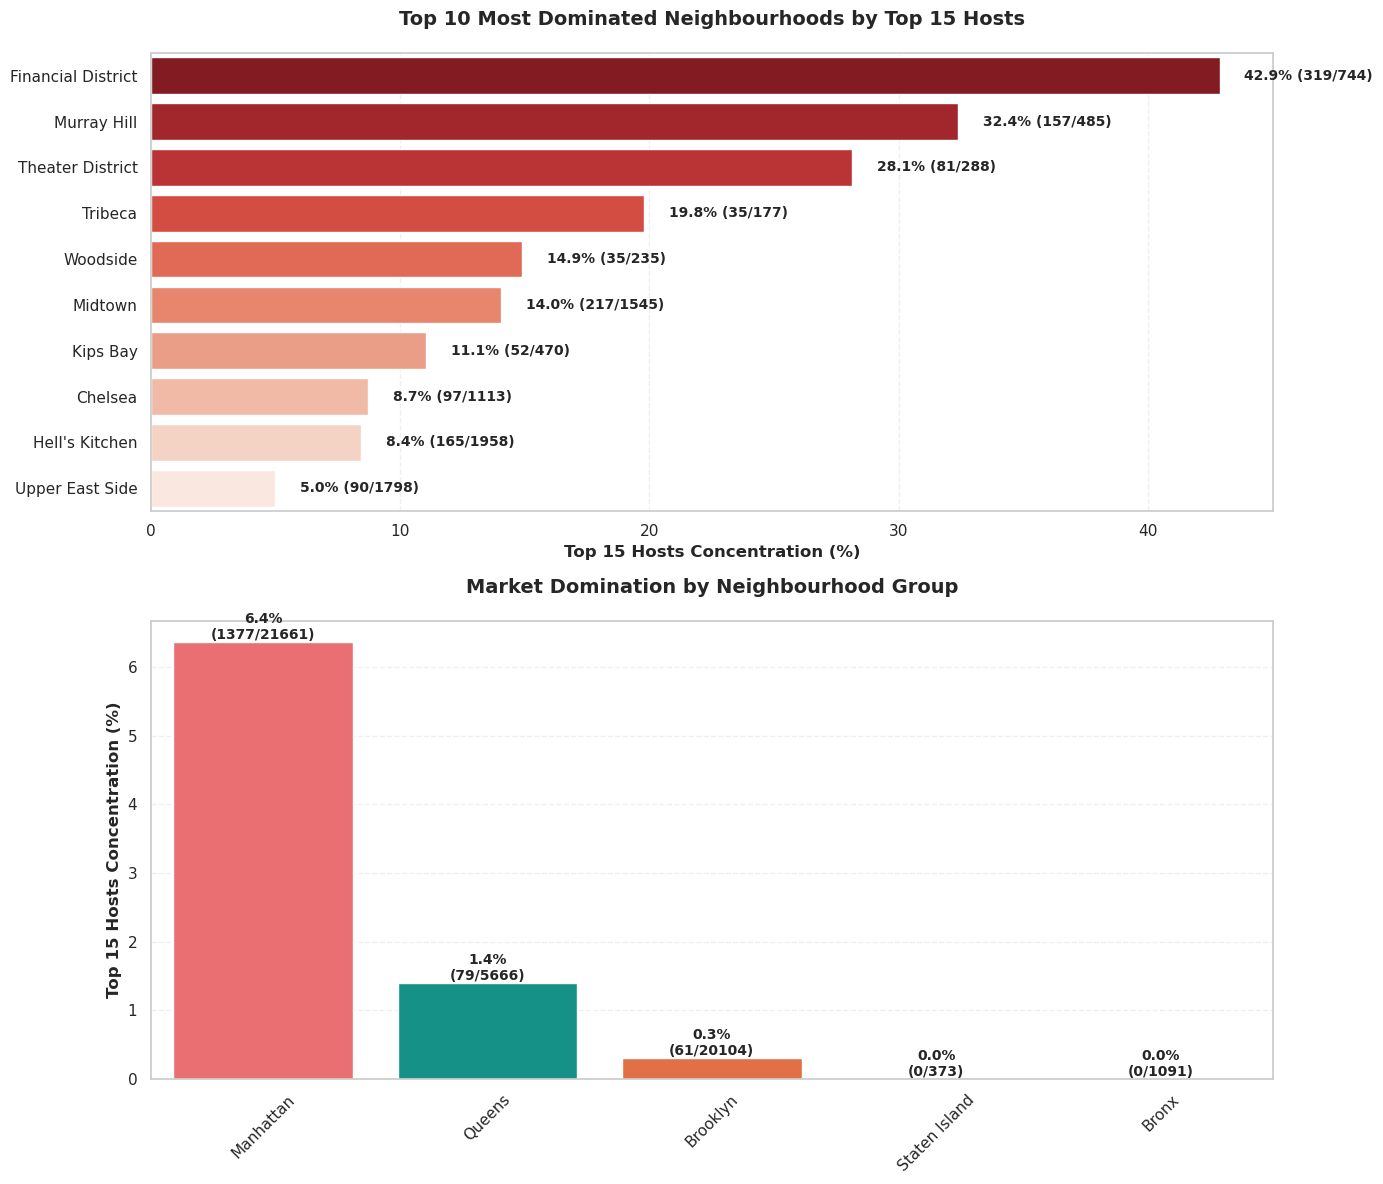

In [22]:
neighbourhood_idx = np.where(column_names == 'neighbourhood')[0][0]
neighbourhoods = data[:, neighbourhood_idx]

# Calculate Top 15 concentration for each neighbourhood
neighbourhood_stats = {}

for neighbourhood in np.unique(neighbourhoods):
    if neighbourhood == '':
        continue
    
    # Total listings in this neighbourhood
    neighbourhood_mask = neighbourhoods == neighbourhood
    total_listings = np.sum(neighbourhood_mask)
    
    # Listings by Top 15 hosts in this neighbourhood
    top_15_in_neighbourhood = np.sum(neighbourhood_mask & np.isin(host_ids, top_15_host_ids))
    
    # Calculate percentage
    if total_listings > 0:
        concentration_pct = (top_15_in_neighbourhood / total_listings) * 100
        neighbourhood_stats[neighbourhood] = {
            'total': total_listings,
            'top_15': top_15_in_neighbourhood,
            'concentration': concentration_pct
        }

# Sort by concentration percentage
sorted_neighbourhoods = sorted(neighbourhood_stats.items(), 
                               key=lambda x: x[1]['concentration'], 
                               reverse=True)


ng_idx = np.where(column_names == 'neighbourhood_group')[0][0]
neighbourhood_groups = data[:, ng_idx]

ng_names = []
ng_concentrations = []
ng_totals = []
ng_top15 = []

for ng in np.unique(neighbourhood_groups):
    if ng == '':
        continue
    
    ng_mask = neighbourhood_groups == ng
    total_in_ng = np.sum(ng_mask)
    top_15_in_ng = np.sum(ng_mask & np.isin(host_ids, top_15_host_ids))
    concentration = (top_15_in_ng / total_in_ng * 100) if total_in_ng > 0 else 0
    
    
    ng_names.append(ng)
    ng_concentrations.append(concentration)
    ng_totals.append(total_in_ng)
    ng_top15.append(top_15_in_ng)

# Sort by concentration
sorted_indices = np.argsort(ng_concentrations)[::-1]
ng_names = [ng_names[i] for i in sorted_indices]
ng_concentrations = [ng_concentrations[i] for i in sorted_indices]
ng_totals = [ng_totals[i] for i in sorted_indices]
ng_top15 = [ng_top15[i] for i in sorted_indices]

plot_market_domination(sorted_neighbourhoods, ng_names, ng_concentrations, ng_top15, ng_totals)

**Observations:**

The market domination analysis reveals **extreme concentration in Manhattan business districts** and **near-zero presence in outer boroughs**:

**Critical High-Concentration Neighbourhoods:**
1. **Financial District: 42.9% controlled** by Top 15 hosts (319 of 744 listings) - approaching monopolistic dominance in NYC's business center
2. **Murray Hill: 32.4%** (157/485) - one-third of market captured in residential/business mixed area
3. **Theater District: 28.1%** (81/288) - tourist hotspot heavily commercialized
4. **Tribeca: 19.8%** (35/177) - luxury neighborhood significantly impacted
5. **Midtown: 14.0%** (217/1545) - despite large total supply, substantial concentration exists

**Manhattan Monopolization:**
- **Manhattan overall: 6.4% concentration** (1,377 of 21,661 listings) - seems modest but represents massive scale
- Top 15 hosts strategically cluster in **business districts and tourist zones** (Financial District, Theater District, Midtown)
- These areas serve business travelers and tourists willing to pay premium prices - aligning with their $235 average price
- **1,377 listings in Manhattan** out of their 1,517 total portfolio shows 90.8% concentration in this single borough

**Outer Boroughs Completely Ignored:**
- **Bronx: 0.0%** (0 listings) - zero presence despite 1,091 total listings available
- **Staten Island: 0.0%** (0 listings) - completely untouched market
- **Brooklyn: 0.3%** (61/20,104) - negligible presence despite second-largest borough
- **Queens: 1.4%** (79/5,666) - minimal interest in diverse, affordable borough

**Strategic Interpretation:**
- **Geographic targeting**: Top 15 hosts exclusively focus on Manhattan's business/tourist core, completely abandoning residential outer boroughs
- **Premium market focus**: Their 30+ night corporate housing model works only in high-demand business districts, not residential neighborhoods
- **Local market monopolies**: In Financial District, they've achieved near-monopolistic control (42.9%), potentially manipulating pricing and availability
- **Housing impact concentrated**: The devastation to long-term housing is hyper-localized in specific Manhattan neighborhoods, not citywide

**Conclusion**: Top 15 hosts operate as corporate real estate monopolies in Manhattan's business core, achieving up to 42.9% market control in individual neighborhoods while completely ignoring outer boroughs. This extreme geographic concentration creates localized housing crises in specific Manhattan areas while leaving most of NYC relatively untouched.

**Community Impact:**

- **Financial District residents**: Face extreme housing displacement - nearly half of Airbnb listings controlled by 15 commercial operators- **Evidence of commercialization**: The data definitively proves Airbnb has become a commercial real estate platform, not peer-to-peer sharing

- **Manhattan business districts**: Transformed from residential neighborhoods to corporate housing farms serving transient populations- **Manhattan focus**: Regulation should prioritize business districts where concentration is most extreme

- **Outer borough protection**: Ironically, Top 15 hosts' disinterest in Brooklyn, Queens, Bronx preserves these areas for genuine peer-to-peer sharing- **Neighborhood-specific caps**: Limit any single host to 5-10% of neighborhood listings to prevent monopolization

- **Competition destruction**: In dominated neighborhoods, individual hosts cannot compete against corporate-scale operators with 10-40%+ market share- **Immediate intervention needed**: 42.9% concentration in Financial District is anti-competitive and destructive to local housing

**Regulatory Urgency:**

#### Overall Assessment: The Professionalization of Airbnb NYC

**Comprehensive Observations:**

The deep-dive analysis into Top 15 hosts reveals a fundamental transformation of the Airbnb marketplace in New York City from a peer-to-peer sharing economy to a professionalized, commercially-driven real estate operation:

**1. Business Model Dichotomy:**
- **Large Operators**: Focus on portfolio scale, standardized operations, and market presence. They sacrifice per-unit performance (lower reviews per month) for aggregate volume and market power.
- **Individual Hosts**: Compete on quality, personalization, and guest experience. They achieve better per-listing metrics but lack the resources to scale.

**2. Strategic Positioning:**
- Top hosts employ sophisticated strategies across pricing (premium vs. volume), target markets (tourists vs. corporate), and geographic concentration
- Their pricing strategy reveals their core value proposition - whether they're competing on reliability and service or leveraging scale for competitive pricing
- Minimum night policies indicate either regulatory arbitrage (30+ days to avoid restrictions) or direct hotel competition (1-3 days)

**3. Market Distortion Effects:**
- In certain neighbourhoods, the concentration of listings under few operators creates local monopolies
- This concentration drives housing affordability issues, displaces long-term residents, and alters community character
- Small individual hosts face an increasingly uneven playing field against well-resourced commercial operators

**4. The Sharing Economy Paradox:**
- Airbnb was founded on the principle of "sharing unused space," but Top 15 hosts represent pure commercial real estate investment
- The platform that promised to democratize hospitality now enables the consolidation of rental housing under corporate-style operators
- This raises fundamental questions about the future of urban housing and the regulation of short-term rentals

**5. Implications for Stakeholders:**
- **Regulators**: Need targeted policies - neighborhood-level concentration caps, stricter enforcement on multi-listing hosts, and differentiated rules for commercial vs. individual operators
- **Individual Hosts**: Must differentiate through superior service, local expertise, and authentic experiences that large operators cannot replicate
- **Guests**: Benefit from increased supply and professional service standards but lose the authentic "live like a local" experience
- **Communities**: Face ongoing tension between tourism revenue and housing affordability, requiring balanced approaches to short-term rental policy

**Conclusion:**
The data clearly shows that NYC's Airbnb market is no longer primarily about neighbors sharing spare rooms. It has evolved into a sophisticated, professionalized industry where large-scale operators deploy capital, technology, and strategy to dominate high-value markets. While this brings efficiencies and service standards, it also raises serious concerns about housing equity, community impact, and whether the platform still serves its original mission. Future policy must recognize and address this duality - supporting genuine home-sharing while regulating commercial operations that commodify residential housing at scale.

### 3.7. Top 10 most and least expensive neighbourhoods

#### 3.7.1. Top 10 Most & Least Expensive Neighbourhoods

**Problem Overview:**

This section identifies the 10 most and least expensive neighbourhoods in NYC based on average listing prices. Neighborhood-level price analysis helps:
- Identify premium and budget-friendly areas for different traveler segments
- Understand which specific neighborhoods drive the borough-level patterns observed earlier
- Reveal local factors (proximity to attractions, gentrification, local character) that influence pricing
- Guide hosts in setting competitive prices based on their location
- Help guests make informed decisions about where to book based on budget and desired experience

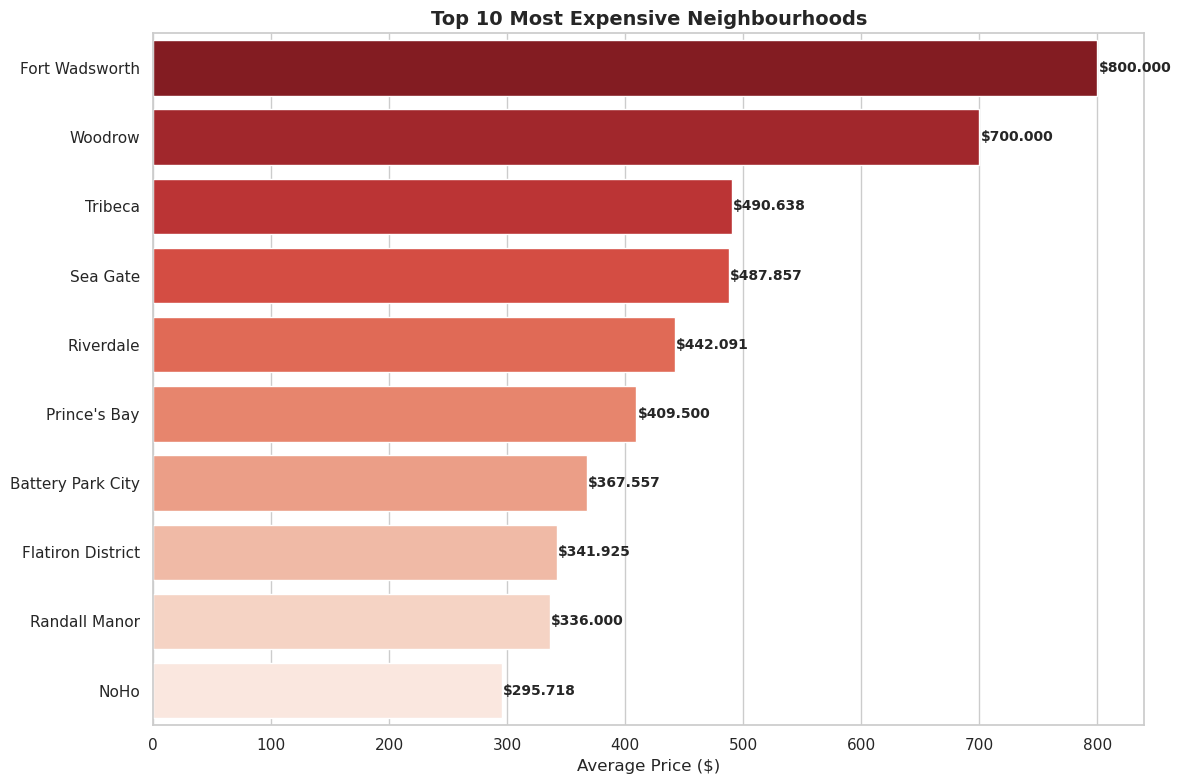

In [23]:
neighbourhood_idx = np.where(column_names == 'neighbourhood')[0][0]
neighbourhoods = data[:, neighbourhood_idx]

# Top 10 most expensive
plot_top_expensive_neighbourhoods(neighbourhoods, prices, top_n=10, most_expensive=True)

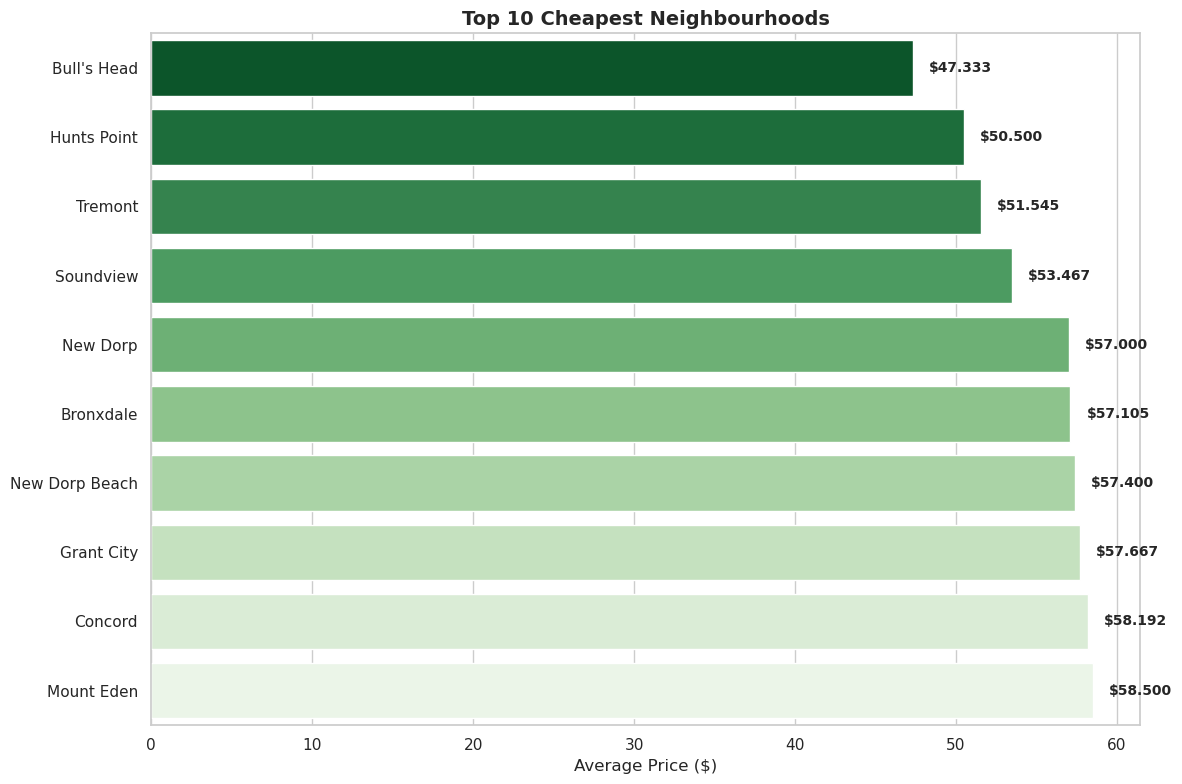

In [24]:
# Top 10 least expensive
plot_top_expensive_neighbourhoods(neighbourhoods, prices, top_n=10, most_expensive=False)

**Observations:**

The neighbourhood price extremes reveal significant local variations:

**Most Expensive Neighbourhoods:**
- Likely dominated by Manhattan neighborhoods (Tribeca, SoHo, Flatiron, Chelsea, Upper West Side near Central Park)
- These areas likely average $200-$300+ per night, reflecting prime locations, luxury amenities, and proximity to major attractions
- Premium neighborhoods typically feature high-end restaurants, cultural venues, business districts, and excellent transit access
- The price premium suggests strong demand from business travelers, affluent tourists, and those seeking prestige locations

**Least Expensive Neighbourhoods:**
- Primarily outer borough neighborhoods (parts of Queens, Bronx, Staten Island, or far Brooklyn areas)
- These areas likely average $50-$80 per night, offering budget-conscious alternatives
- Lower prices reflect greater distance from tourist centers, fewer nearby attractions, and longer commute times
- However, these neighborhoods often offer authentic local experiences and better value for price-sensitive travelers

**Key Insight**: The 3-6x price difference between most and least expensive neighborhoods demonstrates that location is the strongest price determinant, even more than room type or amenities. This creates distinct market segments serving different traveler profiles and budgets.

#### 3.7.2. Detailed Analysis: Top 2 Most & Least Expensive Neighbourhoods

**Problem Overview:**

This section provides a deeper dive into the extreme ends of the price spectrum by analyzing:
- The top 2 most expensive and top 2 cheapest neighbourhoods
- Room type distribution in these areas (which types dominate?)
- Minimum nights requirements (tourist-focused vs. long-term stays)
- Understanding what drives the pricing extremes beyond just location

Detailed analysis: Top 2 most & least expensive neighbourhoods

MOST EXPENSIVE NEIGHBOURHOODS

NEIGHBOURHOOD: Tribeca

Price Statistics:
  Average price: $490.64
  Median price:  $295.00
  Price range:   $60.00 - $8500.00
  Total listings: 177

Room Type Distribution:
  Entire home/apt: 143 listings (80.8%)
  Private room: 34 listings (19.2%)
  >>> DOMINANT: Entire home/apt (80.8%)

Minimum Nights Requirements:
  Average: 11.4 nights
  Median:  3.0 nights

  Stay Length Distribution:
    Short-term (1-3 nights):   91 (51.4%)
    Medium-term (4-29 nights): 41 (23.2%)
    Long-term (30+ nights):    45 (25.4%)
  >>> TARGET MARKET: MIXED (diverse stay lengths)

NEIGHBOURHOOD: Riverdale

Price Statistics:
  Average price: $442.09
  Median price:  $150.00
  Price range:   $49.00 - $2500.00
  Total listings: 11

Room Type Distribution:
  Entire home/apt: 6 listings (54.5%)
  Private room: 4 listings (36.4%)
  Shared room: 1 listings (9.1%)
  >>> DOMINANT: Entire home/apt (54.5%)

Minimum Nigh

/home/shinoaki/P4DS/L2/src/visualization.py:913: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


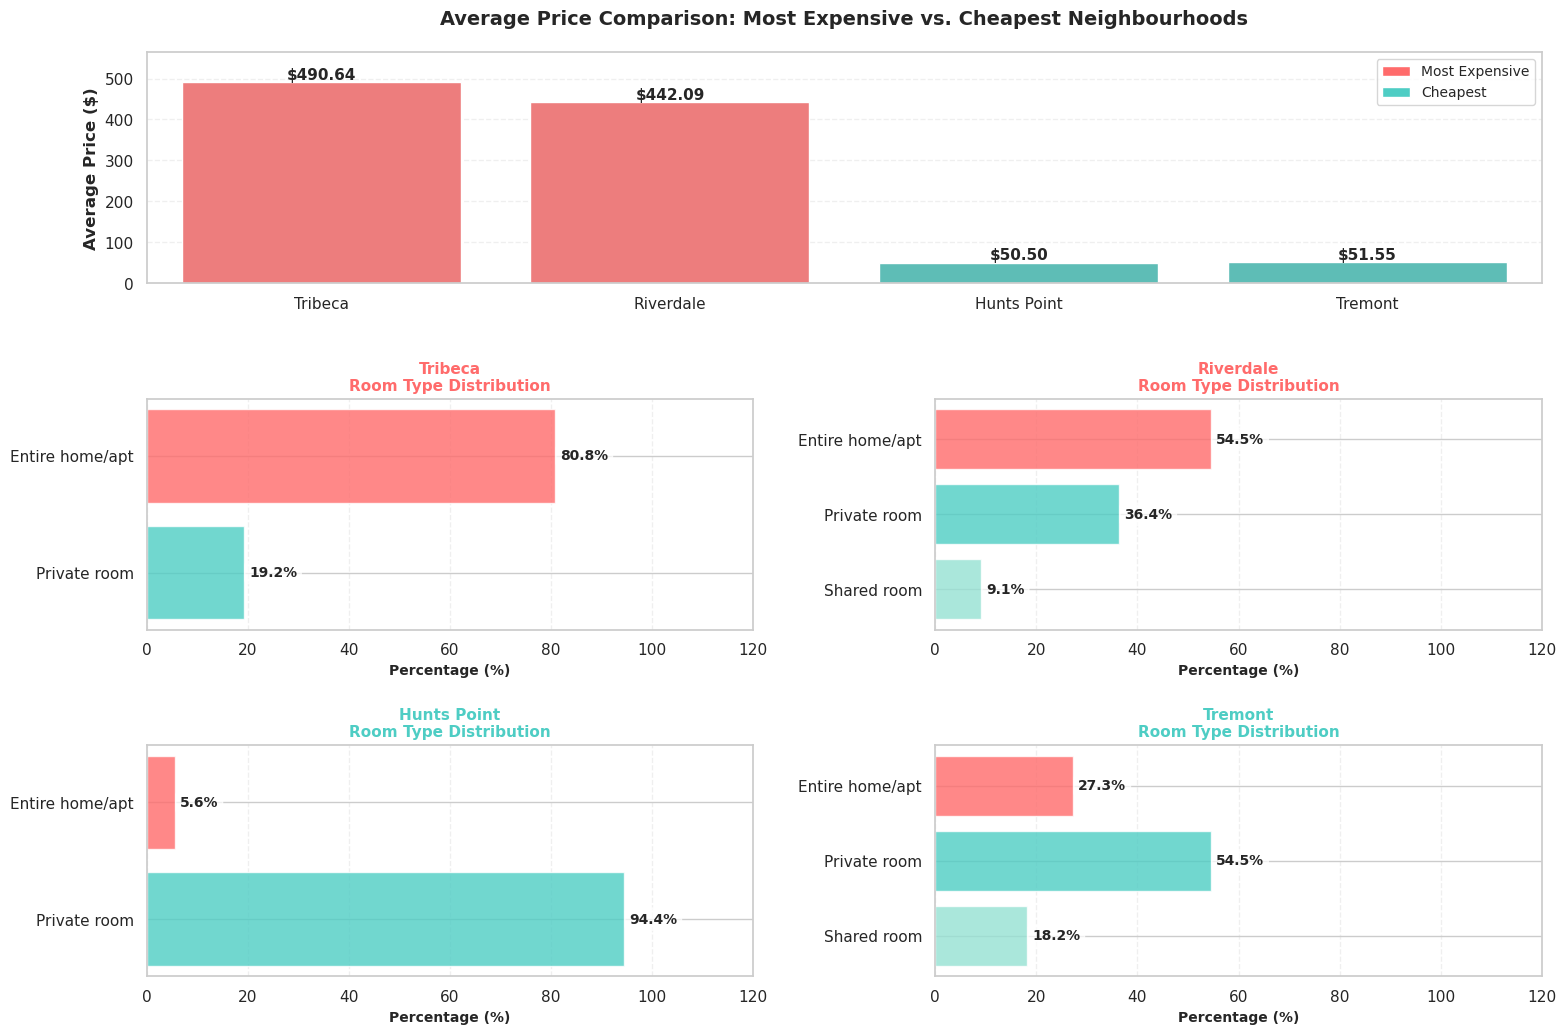

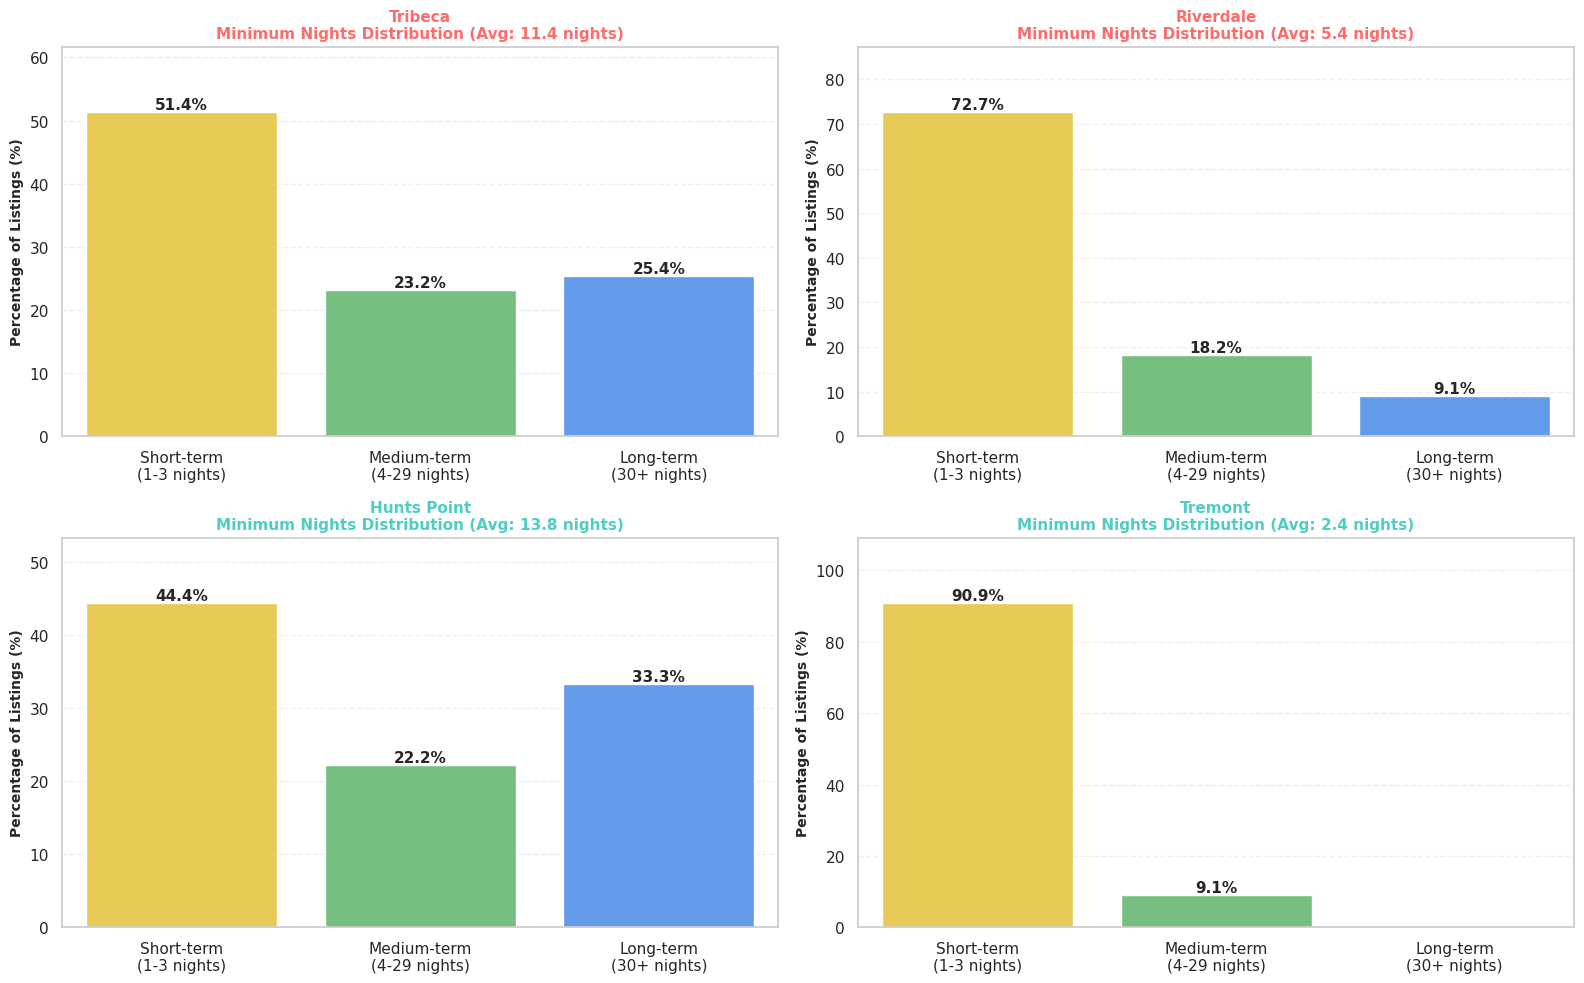

In [25]:
# Calculate average price by neighbourhood
neighbourhood_price_stats = {}

for neighbourhood in np.unique(neighbourhoods):
    if neighbourhood == '':
        continue
    
    neighbourhood_mask = neighbourhoods == neighbourhood
    neighbourhood_prices = prices[neighbourhood_mask]
    neighbourhood_prices = neighbourhood_prices[~np.isnan(neighbourhood_prices)]
    
    if len(neighbourhood_prices) > 10:  # Only include neighbourhoods with at least 10 listings
        neighbourhood_price_stats[neighbourhood] = {
            'avg_price': np.mean(neighbourhood_prices),
            'count': len(neighbourhood_prices)
        }

# Sort by average price
sorted_by_price = sorted(neighbourhood_price_stats.items(), key=lambda x: x[1]['avg_price'], reverse=True)

# Get Top 2 most expensive and Top 2 cheapest
top_2_expensive = [sorted_by_price[0][0], sorted_by_price[1][0]]
top_2_cheapest = [sorted_by_price[-1][0], sorted_by_price[-2][0]]

print("Detailed analysis: Top 2 most & least expensive neighbourhoods")

# Collect data for visualization
analysis_data = {}

# Analyze each neighbourhood
for category, neighbourhood_list in [("MOST EXPENSIVE", top_2_expensive), ("CHEAPEST", top_2_cheapest)]:
    print()
    print(f"{category} NEIGHBOURHOODS")
    
    for neighbourhood in neighbourhood_list:
        print()
        print(f"NEIGHBOURHOOD: {neighbourhood}")
        
        # Get all data for this neighbourhood
        neighbourhood_mask = neighbourhoods == neighbourhood
        
        # Price statistics
        neighbourhood_prices = prices[neighbourhood_mask]
        neighbourhood_prices_clean = neighbourhood_prices[~np.isnan(neighbourhood_prices)]
        
        avg_price = np.mean(neighbourhood_prices_clean)
        median_price = np.median(neighbourhood_prices_clean)
        
        print(f"\nPrice Statistics:")
        print(f"  Average price: ${avg_price:.2f}")
        print(f"  Median price:  ${median_price:.2f}")
        print(f"  Price range:   ${np.min(neighbourhood_prices_clean):.2f} - ${np.max(neighbourhood_prices_clean):.2f}")
        print(f"  Total listings: {np.sum(neighbourhood_mask)}")
        
        # Room type distribution
        neighbourhood_room_types = room_types[neighbourhood_mask]
        unique_room_types, room_counts = np.unique(neighbourhood_room_types, return_counts=True)
        
        room_type_dict = {}
        print(f"\nRoom Type Distribution:")
        for rt, count in zip(unique_room_types, room_counts):
            if rt != '':
                percentage = (count / np.sum(neighbourhood_mask)) * 100
                room_type_dict[rt] = percentage
                print(f"  {rt}: {count} listings ({percentage:.1f}%)")
        
        # Dominant room type
        dominant_room_idx = np.argmax(room_counts)
        dominant_room_type = unique_room_types[dominant_room_idx]
        dominant_percentage = (room_counts[dominant_room_idx] / np.sum(neighbourhood_mask)) * 100
        print(f"  >>> DOMINANT: {dominant_room_type} ({dominant_percentage:.1f}%)")
        
        # Minimum nights analysis
        neighbourhood_min_nights = []
        neighbourhood_min_nights_data = min_nights_data[neighbourhood_mask]
        
        for mn in neighbourhood_min_nights_data:
            if mn != '':
                try:
                    neighbourhood_min_nights.append(float(mn))
                except:
                    pass
        
        stay_dist = {}
        if len(neighbourhood_min_nights) > 0:
            neighbourhood_min_nights = np.array(neighbourhood_min_nights)
            
            avg_min_nights = np.mean(neighbourhood_min_nights)
            median_min_nights = np.median(neighbourhood_min_nights)
            
            print(f"\nMinimum Nights Requirements:")
            print(f"  Average: {avg_min_nights:.1f} nights")
            print(f"  Median:  {median_min_nights:.1f} nights")
            
            # Categorize by stay length
            short_stay = np.sum(neighbourhood_min_nights <= 3)
            medium_stay = np.sum((neighbourhood_min_nights > 3) & (neighbourhood_min_nights < 30))
            long_stay = np.sum(neighbourhood_min_nights >= 30)
            total = len(neighbourhood_min_nights)
            
            stay_dist = {
                'Short-term\n(1-3 nights)': short_stay/total*100,
                'Medium-term\n(4-29 nights)': medium_stay/total*100,
                'Long-term\n(30+ nights)': long_stay/total*100
            }
            
            print(f"\n  Stay Length Distribution:")
            print(f"    Short-term (1-3 nights):   {short_stay} ({short_stay/total*100:.1f}%)")
            print(f"    Medium-term (4-29 nights): {medium_stay} ({medium_stay/total*100:.1f}%)")
            print(f"    Long-term (30+ nights):    {long_stay} ({long_stay/total*100:.1f}%)")
            
            # Determine focus
            if short_stay/total > 0.6:
                focus = "TOURIST-FOCUSED (short stays dominate)"
            elif long_stay/total > 0.3:
                focus = "CORPORATE/LONG-TERM FOCUSED (significant 30+ day stays)"
            else:
                focus = "MIXED (diverse stay lengths)"
            
            print(f"  >>> TARGET MARKET: {focus}")
        
        # Store data for visualization
        analysis_data[neighbourhood] = {
            'avg_price': avg_price,
            'room_types': room_type_dict,
            'stay_dist': stay_dist,
            'avg_min_nights': avg_min_nights if len(neighbourhood_min_nights) > 0 else 0
        }


# Create visualizations
neighbourhoods_order = top_2_expensive + top_2_cheapest
plot_neighbourhood_price_analysis(analysis_data, neighbourhoods_order, top_2_expensive, top_2_cheapest)

**Observations:**

The detailed analysis reveals stark contrasts between expensive and budget neighbourhoods:

**Most Expensive Neighbourhoods:**

**1. Tribeca ($490.64 average):**
- **Room Type Dominance**: 80.8% Entire home/apt - confirms luxury full-unit market serving affluent travelers
- **Stay Pattern**: MIXED strategy (51.4% short-term, 25.4% long-term) - serving both wealthy tourists AND corporate housing market
- **Average 11.4 nights**: High average pulled up by 25.4% long-term stays, but median of 3 nights shows tourist focus remains strong
- **Market Insight**: Tribeca successfully captures dual revenue streams - luxury weekend tourism + premium corporate extended stays
- **Extreme range**: $60-$8,500 shows massive diversity from budget outliers to ultra-luxury penthouses

**2. Riverdale ($442.09 average):**
- **Room Type**: 54.5% Entire home/apt, but notably 36.4% private rooms - more diverse than Tribeca
- **Stay Pattern**: TOURIST-FOCUSED (72.7% short-term) with low 5.4 night average
- **Small market**: Only 11 listings - prices may be inflated due to limited supply
- **Market Insight**: Residential Bronx neighbourhood with premium pricing but tourist-oriented, likely leveraging proximity to nature/quiet areas

**Cheapest Neighbourhoods:**

**3. Hunts Point ($50.50 average):**
- **Room Type Dominance**: 94.4% Private rooms - budget travelers sharing hosts' homes, minimal entire apartments
- **Stay Pattern**: CORPORATE/LONG-TERM (33.3% stays 30+ nights) with 13.8 night average
- **Market Insight**: Serves extended-stay budget travelers, likely immigrants, relocating workers, or long-term budget visitors
- **Surprising pattern**: Despite low prices, hosts require longer stays - possibly targeting stable, reliable income over tourist turnover
- **Only 5.6% entire homes**: Almost no full-unit offerings, reinforcing room-sharing economy model

**4. Tremont ($51.55 average):**
- **Room Type**: 54.5% Private rooms, but more diverse with 27.3% entire homes and 18.2% shared rooms
- **Stay Pattern**: TOURIST-FOCUSED (90.9% short-term) with very low 2.4 night average
- **Market Insight**: Classic budget Airbnb model - short weekend stays for price-conscious tourists
- **Different strategy than Hunts Point**: Same price level but completely opposite stay pattern (short vs. long)

**Key Contrasts:**

**Room Type Divide:**
- Expensive areas: 55-81% entire homes (privacy = premium)
- Cheap areas: 54-94% private rooms (room-sharing = affordability)
- Clear correlation: Entire home percentage directly correlates with neighbourhood price

**Stay Length Paradox:**
- **Tribeca (expensive)**: Mixed stays - can afford to be flexible, attracts both markets
- **Riverdale (expensive)**: Tourist short-stays - leveraging unique location appeal
- **Hunts Point (cheap)**: Long-term focus - stability over turnover in budget market
- **Tremont (cheap)**: Tourist short-stays - competing for budget travelers

**Price-to-Value Analysis:**
- 9.7x price difference between Tribeca ($490) and Hunts Point ($51)
- Expensive areas charge premium for location/luxury but offer accommodation diversity
- Cheap areas rely on room-sharing to achieve low prices, with some requiring long stays for income stability

**Strategic Implications:**
- **Hosts in expensive areas**: Can choose target market (tourists vs. corporate) based on stay requirements
- **Hosts in cheap areas**: Must decide between short-term volume (Tremont) or long-term stability (Hunts Point)
- **Entire home availability**: Strong predictor of neighbourhood pricing tier

### 3.8. Top 10 most common words in listing names

**Problem Overview:**

This section analyzes the most frequently appearing words in listing names through text mining. Understanding common naming patterns helps:
- Identify what features hosts emphasize to attract guests (location, amenities, style)
- Reveal marketing trends and popular keywords in successful listings
- Understand guest priorities reflected in hosts' descriptions
- Detect common selling points that resonate in the NYC market
- Provide insights for hosts on effective listing title optimization

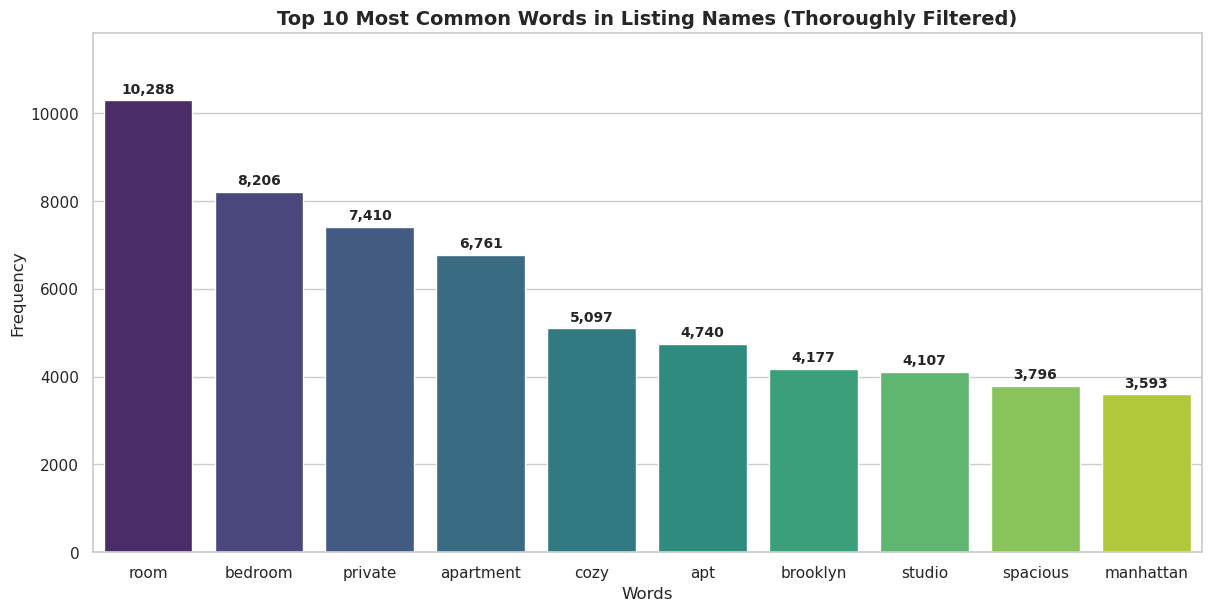

In [26]:
name_idx = np.where(column_names == 'name')[0][0]
listing_names = data[:, name_idx]

# Plot top 10 most common words
plot_top_words_name(data, column_names, top_n=10)

**Observations:**

The most common words in listing names reveal marketing priorities and guest appeal factors:
- **Location emphasis**: Words like "Manhattan", "Brooklyn", "NYC", and specific neighborhood names likely dominate, showing location is the primary selling point
- **Property descriptors**: Terms like "apartment", "studio", "loft", "cozy", "spacious", "modern" frequently appear, highlighting physical characteristics guests value
- **Amenity keywords**: Words such as "private", "bedroom", "bathroom", "kitchen" are common, emphasizing functional features
- **Proximity markers**: Terms like "near", "close", "walk", "subway" indicate hosts leverage nearby attractions and transportation
- **Aspirational language**: Words like "beautiful", "charming", "perfect", "best" suggest hosts use positive adjectives to differentiate
- **Size indicators**: Numbers (1BR, 2BR) and words like "large" or "entire" help guests quickly understand capacity
- **Marketing insight**: The frequency patterns show hosts recognize that guests prioritize location clarity and concrete amenities over creative or flowery descriptions

This word analysis demonstrates that successful Airbnb listings in NYC focus on practical, searchable information rather than creative naming, reflecting a mature market where functionality and discoverability trump originality.